In [1]:
import networkx as nx
import pickle

import numpy as np; np.set_printoptions(suppress=True, linewidth=180)
import pandas as pd; pd.set_option('display.width', 500)

#import os
#import ipywidgets as widgets
#from ipyfilechooser import FileChooser

from plot_module import plot_ode_results, plot_sde_results, plot_simulator_graph, plot_neuron_graph_subset
from sim_param_from_network import names_from_network, sde_param_from_network, ode_from_network, start_state_from_nodes
from neuron_graph_process import neuron_graph_process
from neuron_graph_helper import load_pickled_neuron_graph

from simulate import simulate_ode, simulate_gillespie, simulate_tauleaping

In [2]:
G = load_pickled_neuron_graph('neuron_graphs/2_compartment_model.pkl')

In [3]:
DELTA = 0.25

TIME_POINTS = np.linspace(0, 4000, 1001)
VARS, NODES = names_from_network(G)
START_STATE = start_state_from_nodes(G, heteroplasmy=0.5, delta=DELTA)
REP = 10000


<<<< #### STARTING SIMULATION WITH C_B = 0.1 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 0.1*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 0.1*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


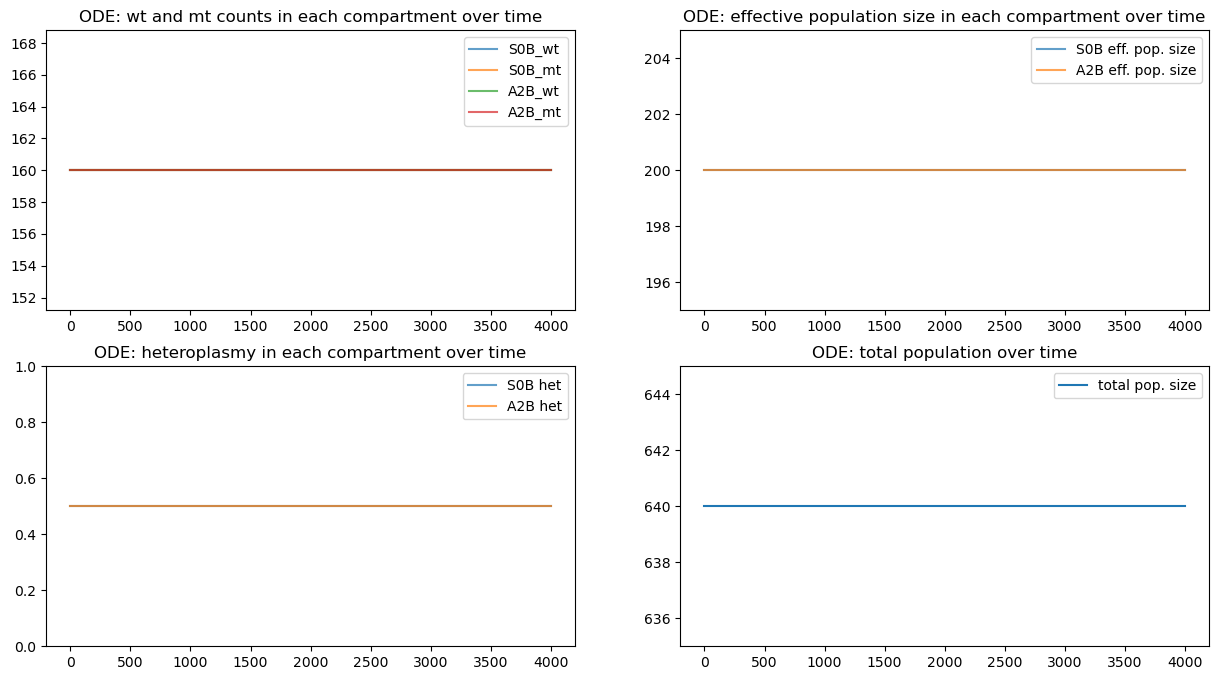

simulating using gillespie...


100%|██████████| 10000/10000 [22:25<00:00,  7.43it/s]


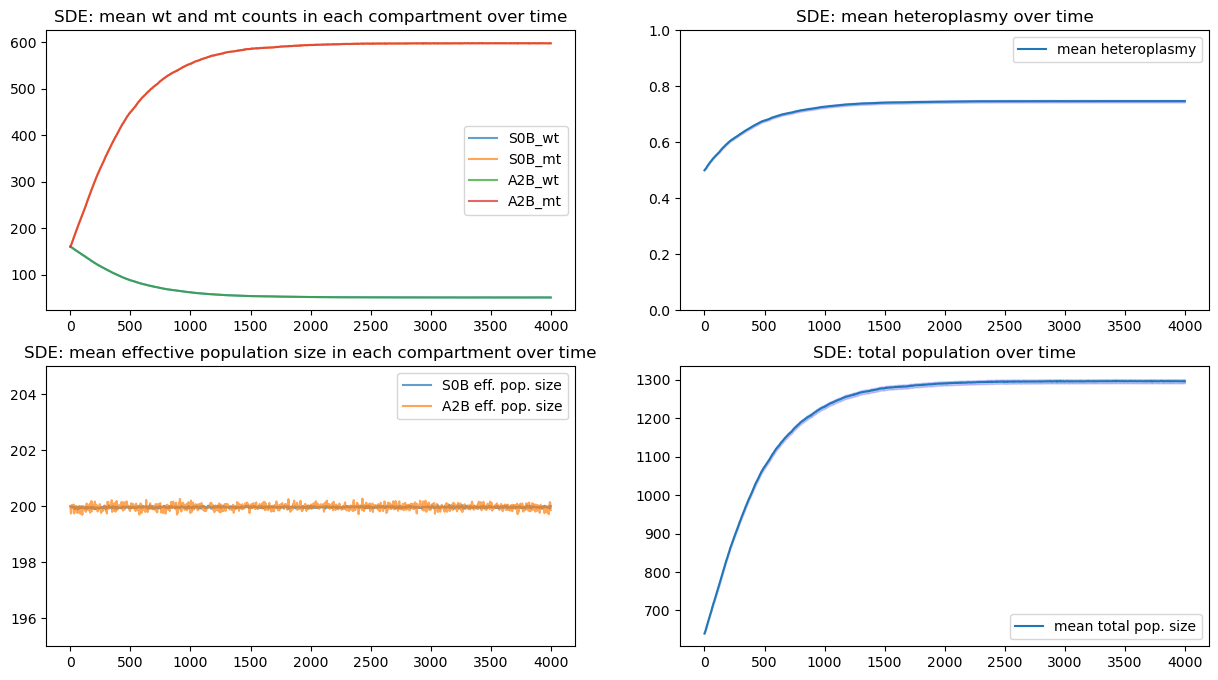

> Final mean counts of mt and wt in each compartment:
['S0B_wt  50.6264', 'S0B_mt  597.5238', 'A2B_wt  50.5613', 'A2B_mt  597.1974']

> Final mean effective population sizes in each compartment:
['S0B  200.0074', 'A2B  199.8606']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.747 +-0.0043
delta: 0.247
simulating using tau leaping...


100%|██████████| 10000/10000 [06:30<00:00, 25.64it/s]


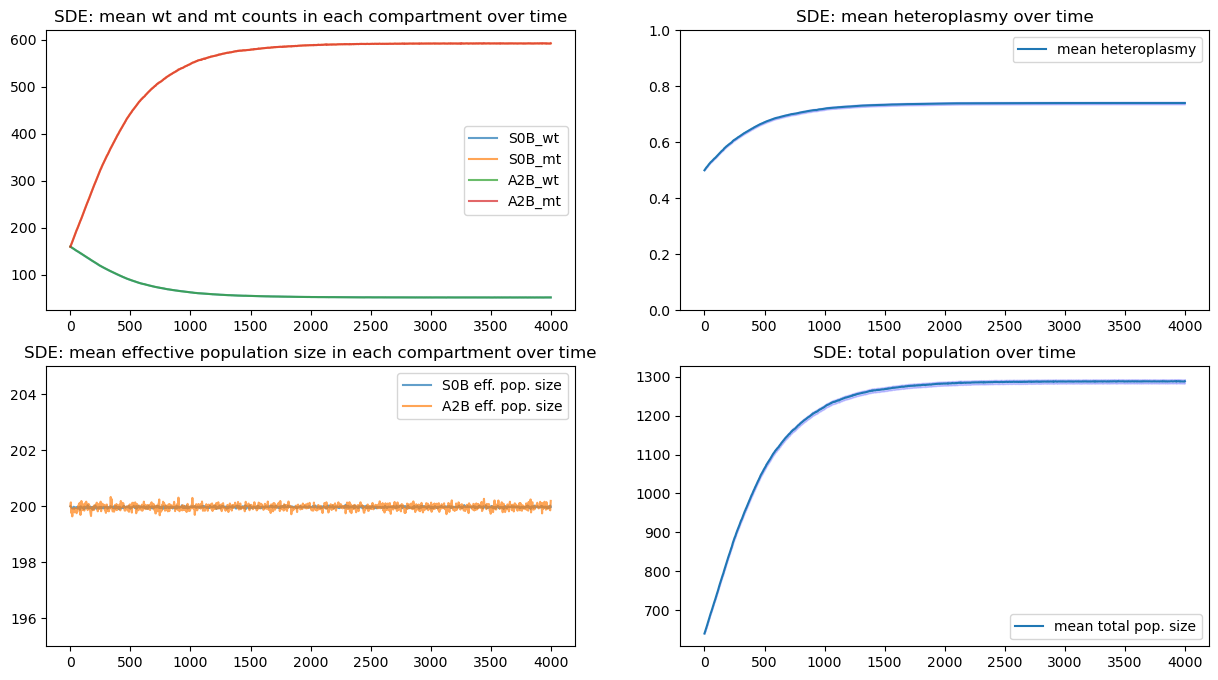

> Final mean counts of mt and wt in each compartment:
['S0B_wt  51.9588', 'S0B_mt  592.0689', 'A2B_wt  52.0553', 'A2B_mt  592.5454']

> Final mean effective population sizes in each compartment:
['S0B  199.976', 'A2B  200.1916']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.7402 +-0.0044
delta: 0.2402

<<<< #### STARTING SIMULATION WITH C_B = 0.01 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 0.01*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 0.01*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


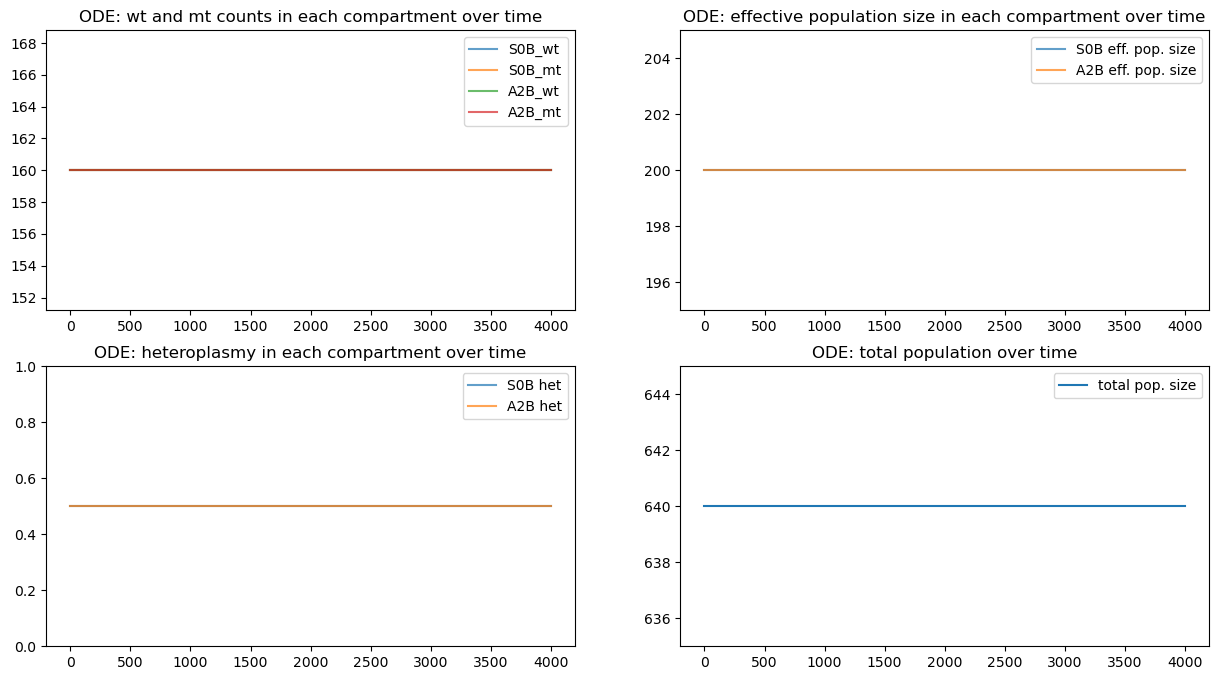

simulating using gillespie...


100%|██████████| 10000/10000 [20:39<00:00,  8.07it/s]


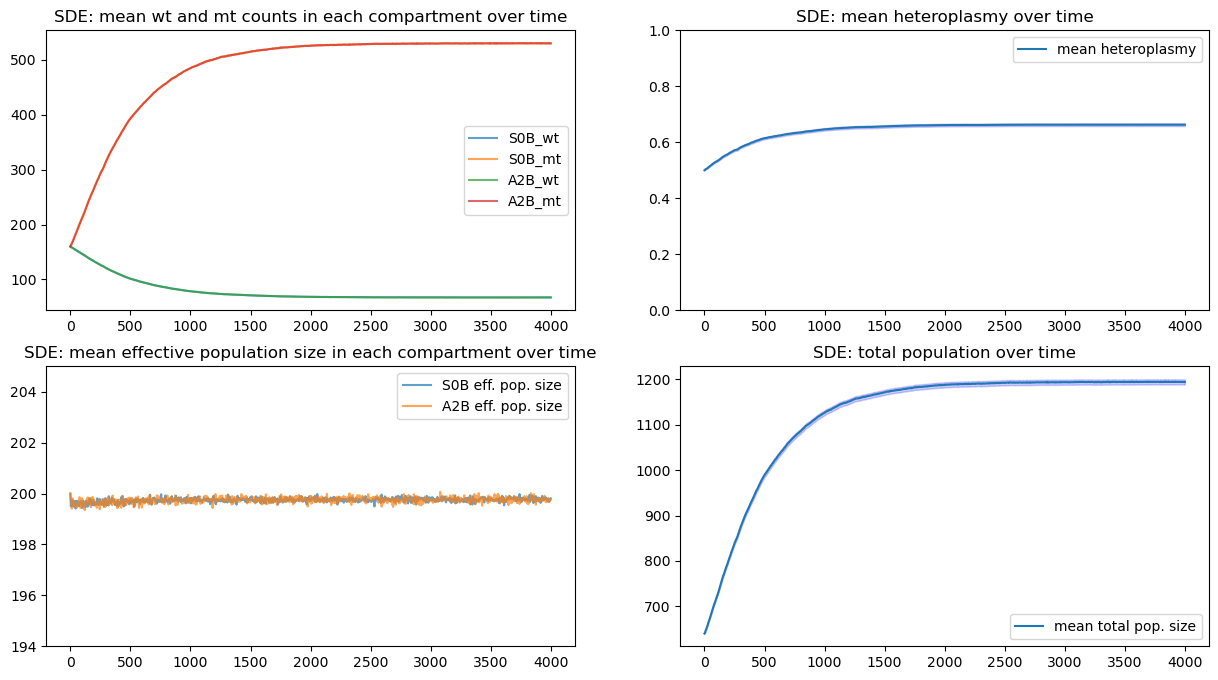

> Final mean counts of mt and wt in each compartment:
['S0B_wt  67.3329', 'S0B_mt  529.9093', 'A2B_wt  67.3621', 'A2B_mt  529.5791']

> Final mean effective population sizes in each compartment:
['S0B  199.8102', 'A2B  199.7569']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.6627 +-0.0047
delta: 0.1627
simulating using tau leaping...


100%|██████████| 10000/10000 [06:17<00:00, 26.48it/s]


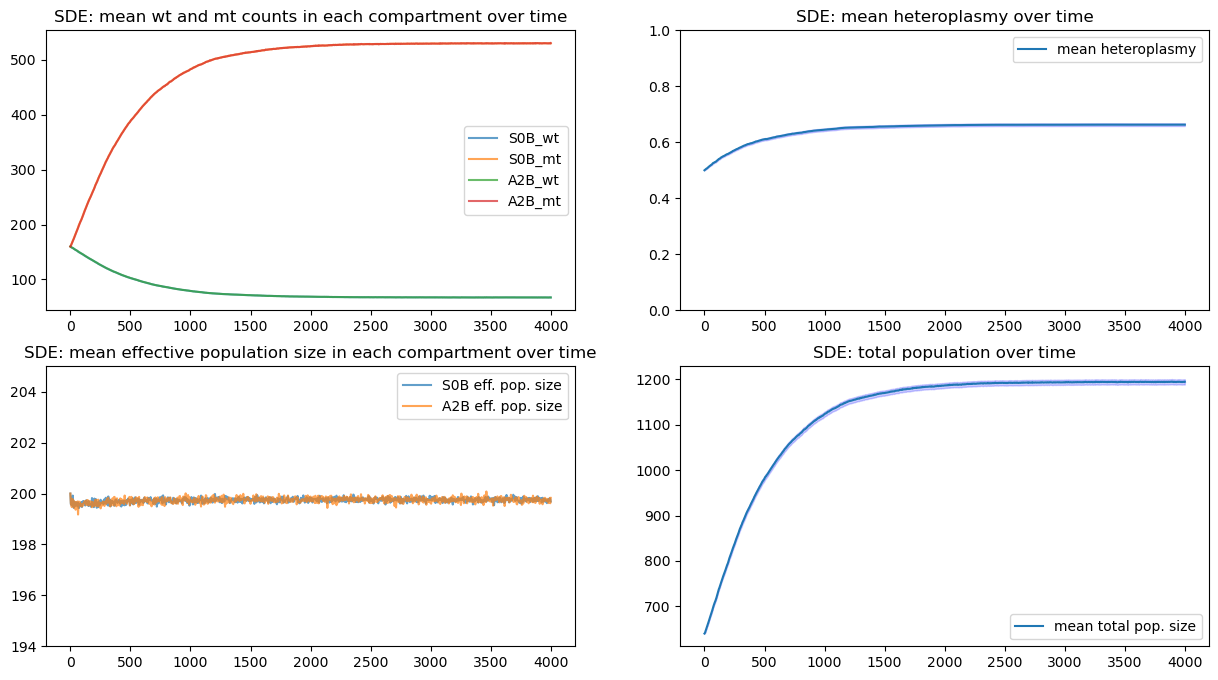

> Final mean counts of mt and wt in each compartment:
['S0B_wt  67.2283', 'S0B_mt  529.8406', 'A2B_wt  67.2413', 'A2B_mt  530.3575']

> Final mean effective population sizes in each compartment:
['S0B  199.6884', 'A2B  199.8307']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.6629 +-0.0047
delta: 0.1629

<<<< #### STARTING SIMULATION WITH C_B = 0.001 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 0.001*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 0.001*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


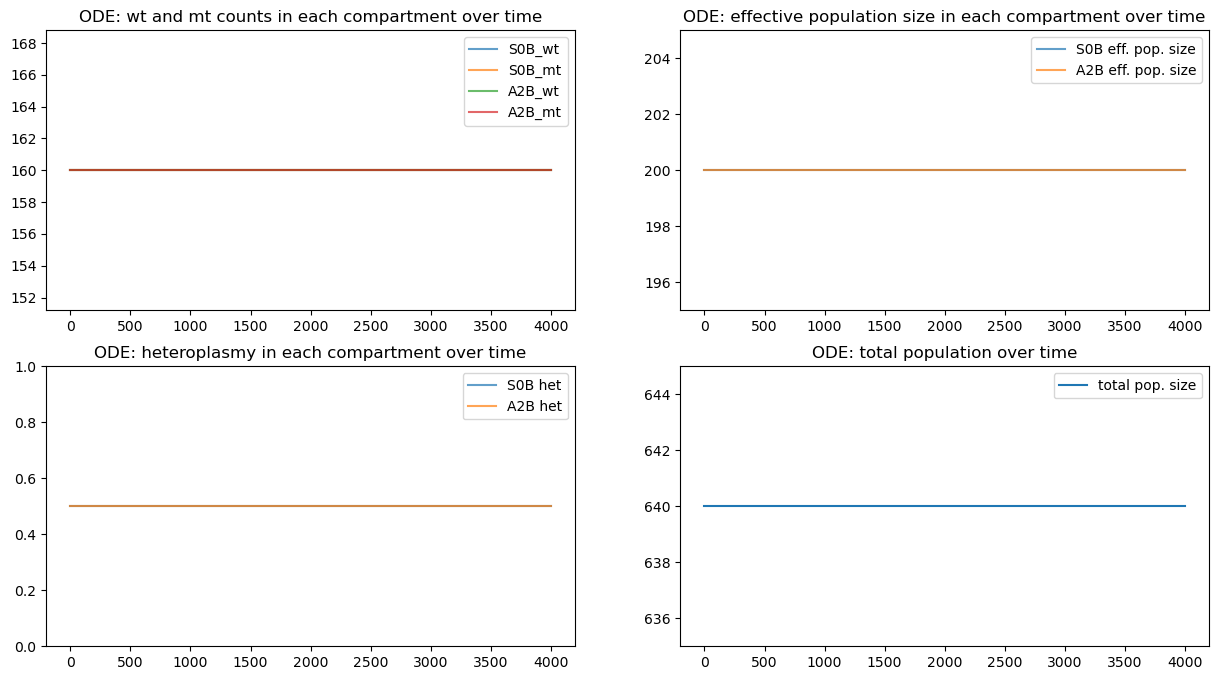

simulating using gillespie...


100%|██████████| 10000/10000 [18:04<00:00,  9.22it/s]


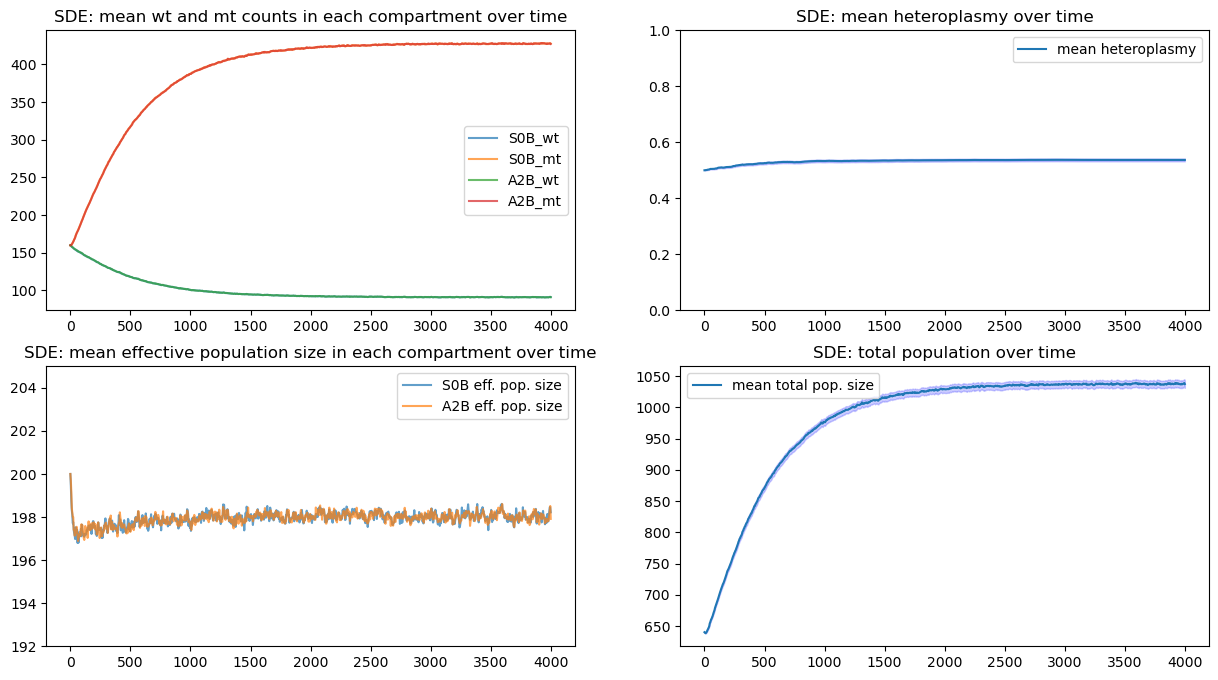

> Final mean counts of mt and wt in each compartment:
['S0B_wt  91.2803', 'S0B_mt  427.762', 'A2B_wt  91.0997', 'A2B_mt  427.2602']

> Final mean effective population sizes in each compartment:
['S0B  198.2208', 'A2B  197.9148']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5369 +-0.005
delta: 0.0369
simulating using tau leaping...


100%|██████████| 10000/10000 [05:59<00:00, 27.81it/s]


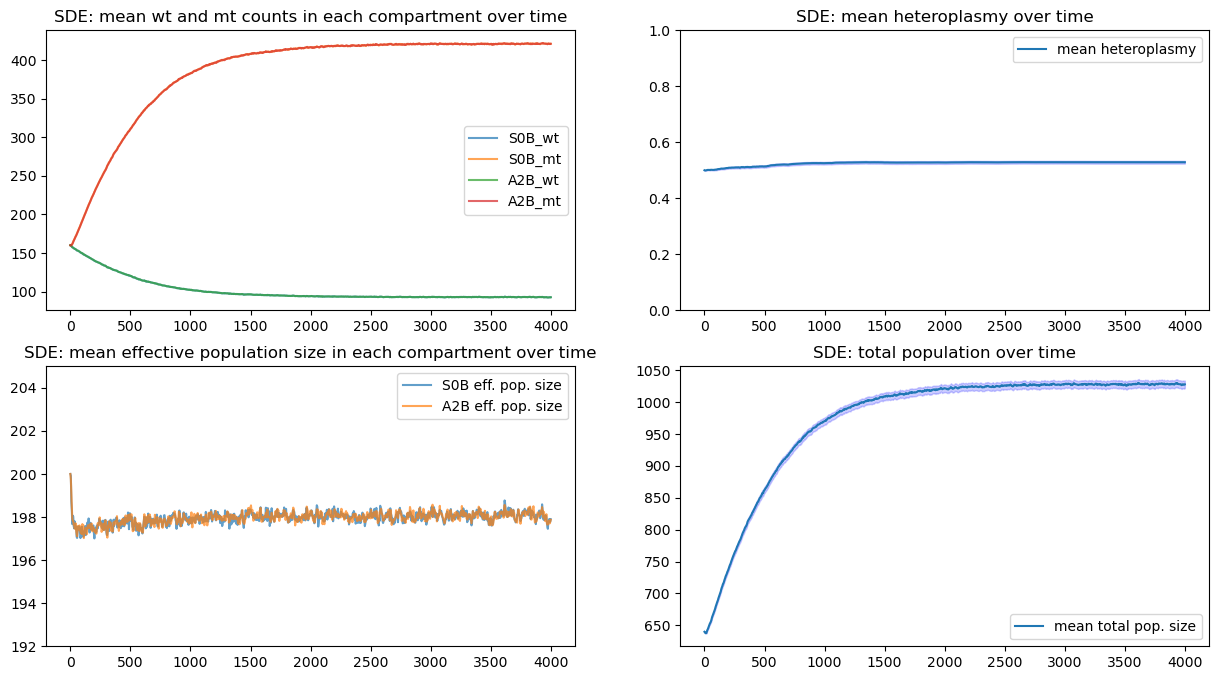

> Final mean counts of mt and wt in each compartment:
['S0B_wt  92.5676', 'S0B_mt  421.331', 'A2B_wt  92.5566', 'A2B_mt  421.262']

> Final mean effective population sizes in each compartment:
['S0B  197.9004', 'A2B  197.8721']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5288 +-0.005
delta: 0.0288

<<<< #### STARTING SIMULATION WITH C_B = 0.0005 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 0.0005*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 0.0005*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


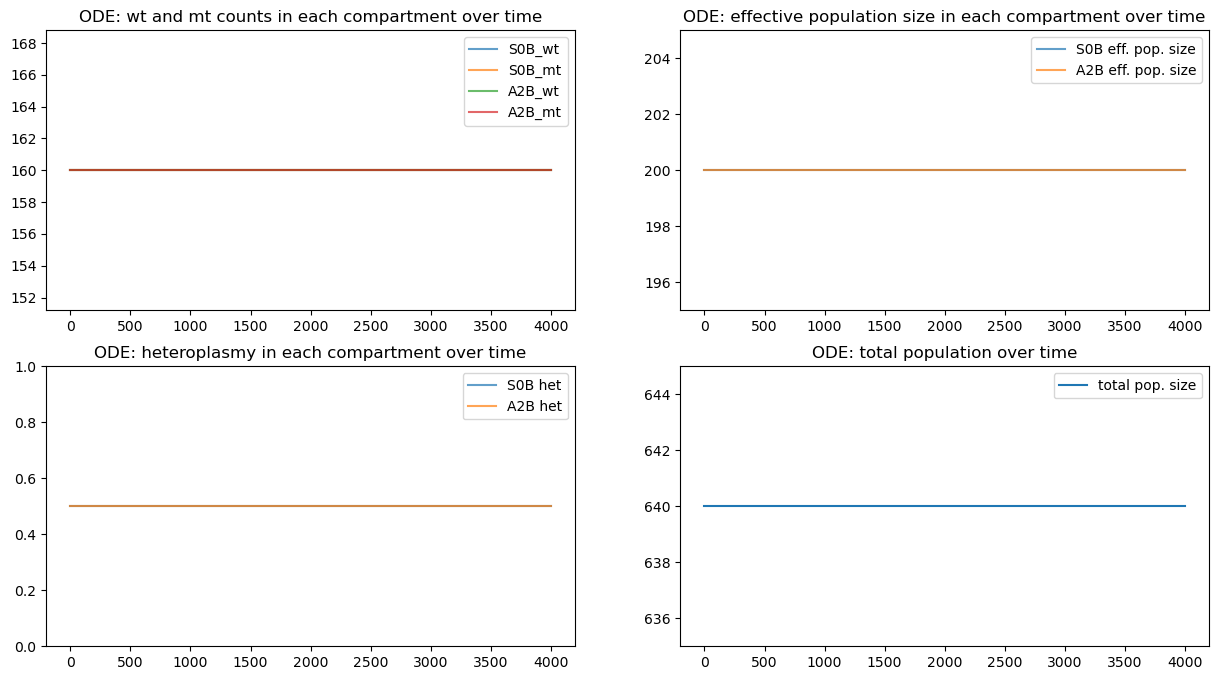

simulating using gillespie...


100%|██████████| 10000/10000 [17:39<00:00,  9.44it/s]


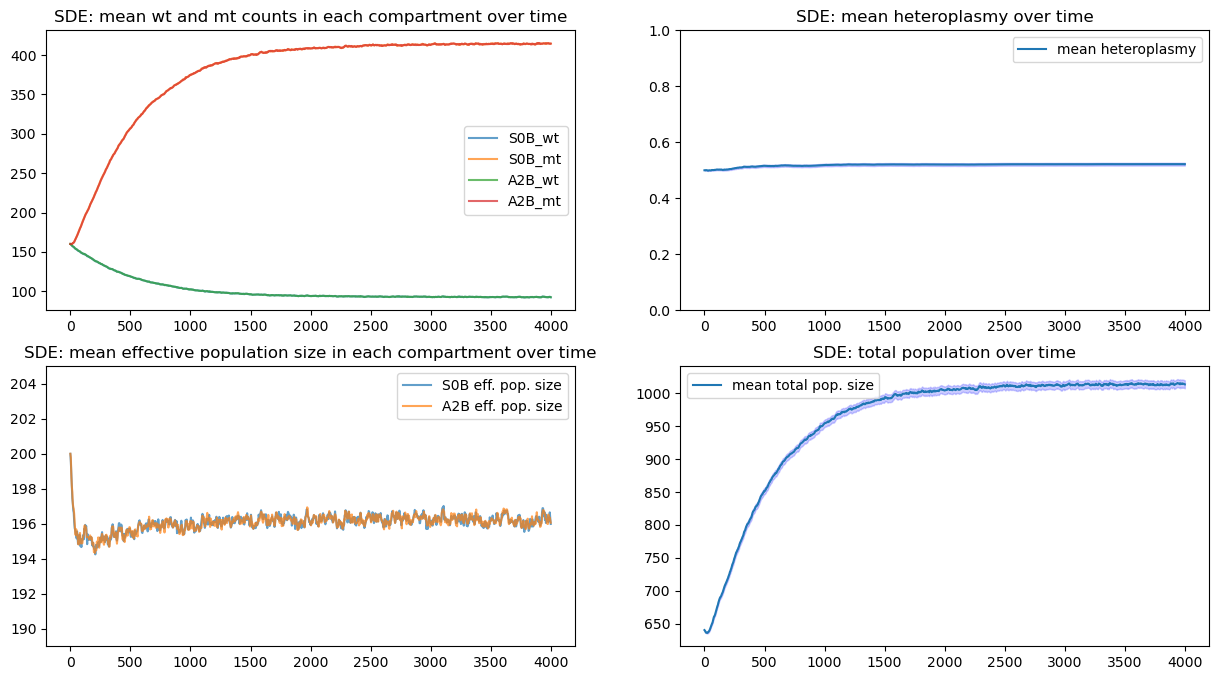

> Final mean counts of mt and wt in each compartment:
['S0B_wt  92.3697', 'S0B_mt  414.4773', 'A2B_wt  92.441', 'A2B_mt  414.4824']

> Final mean effective population sizes in each compartment:
['S0B  195.989', 'A2B  196.0616']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5219 +-0.005
delta: 0.0219
simulating using tau leaping...


100%|██████████| 10000/10000 [05:58<00:00, 27.88it/s]


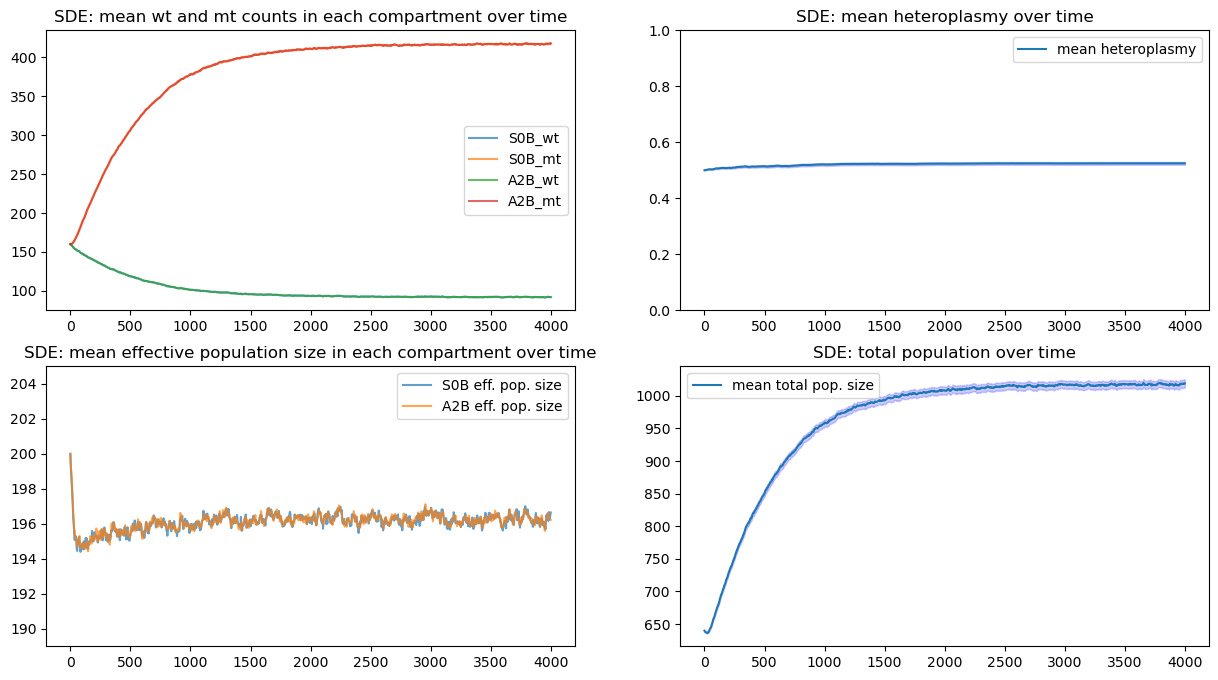

> Final mean counts of mt and wt in each compartment:
['S0B_wt  92.1489', 'S0B_mt  417.9872', 'A2B_wt  91.968', 'A2B_mt  417.0098']

> Final mean effective population sizes in each compartment:
['S0B  196.6457', 'A2B  196.2204']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5248 +-0.005
delta: 0.0248

<<<< #### STARTING SIMULATION WITH C_B = 0.0001 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 0.0001*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 0.0001*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


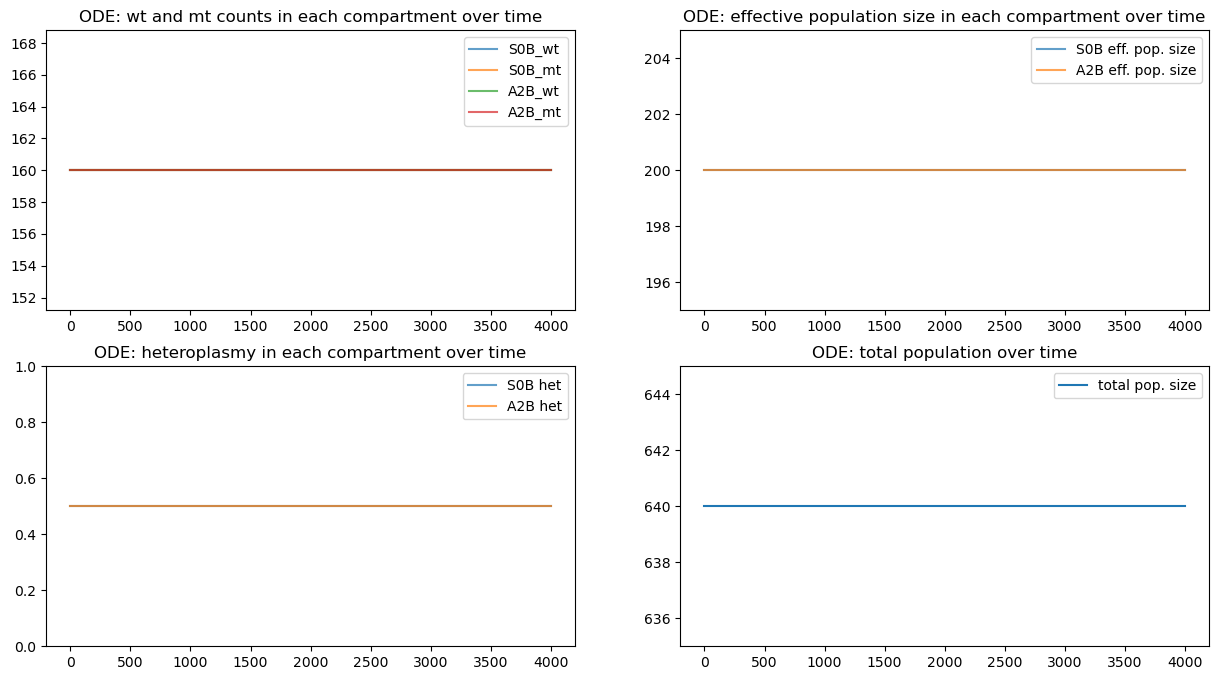

simulating using gillespie...


100%|██████████| 10000/10000 [15:31<00:00, 10.73it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


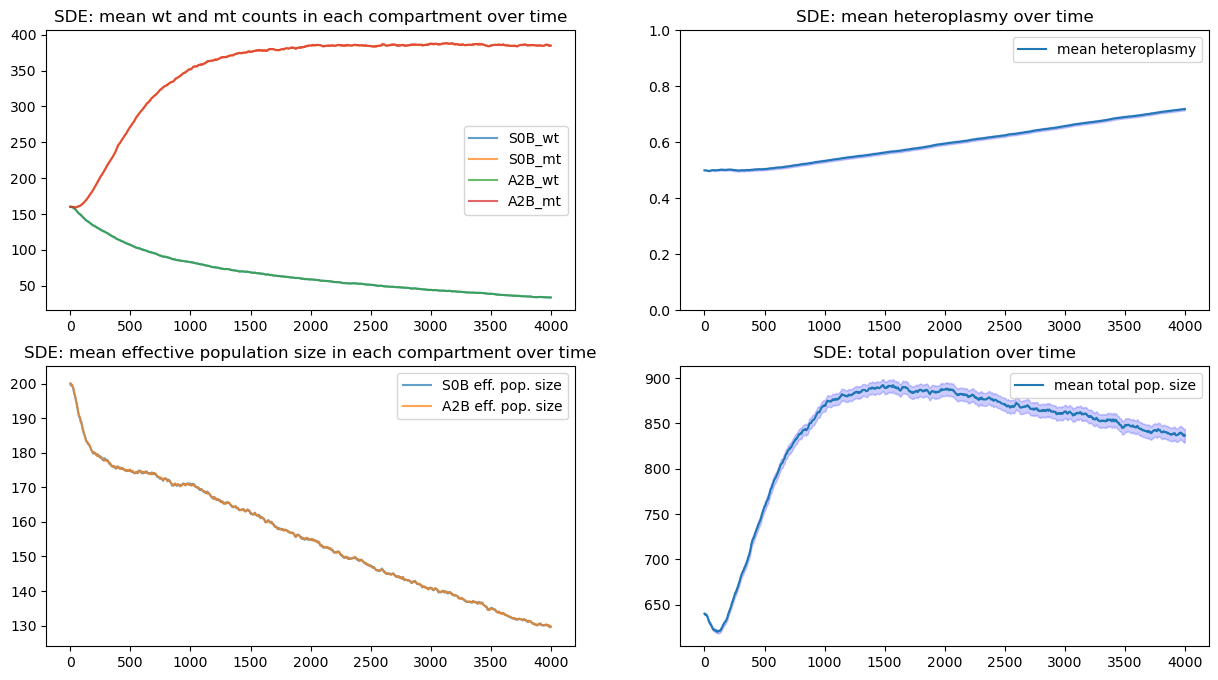

> Final mean counts of mt and wt in each compartment:
['S0B_wt  33.4914', 'S0B_mt  384.6694', 'A2B_wt  33.5174', 'A2B_mt  385.0625']

> Final mean effective population sizes in each compartment:
['S0B  129.6588', 'A2B  129.783']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.7186 +-0.0045
delta: 0.2186
simulating using tau leaping...


100%|██████████| 10000/10000 [05:35<00:00, 29.77it/s]


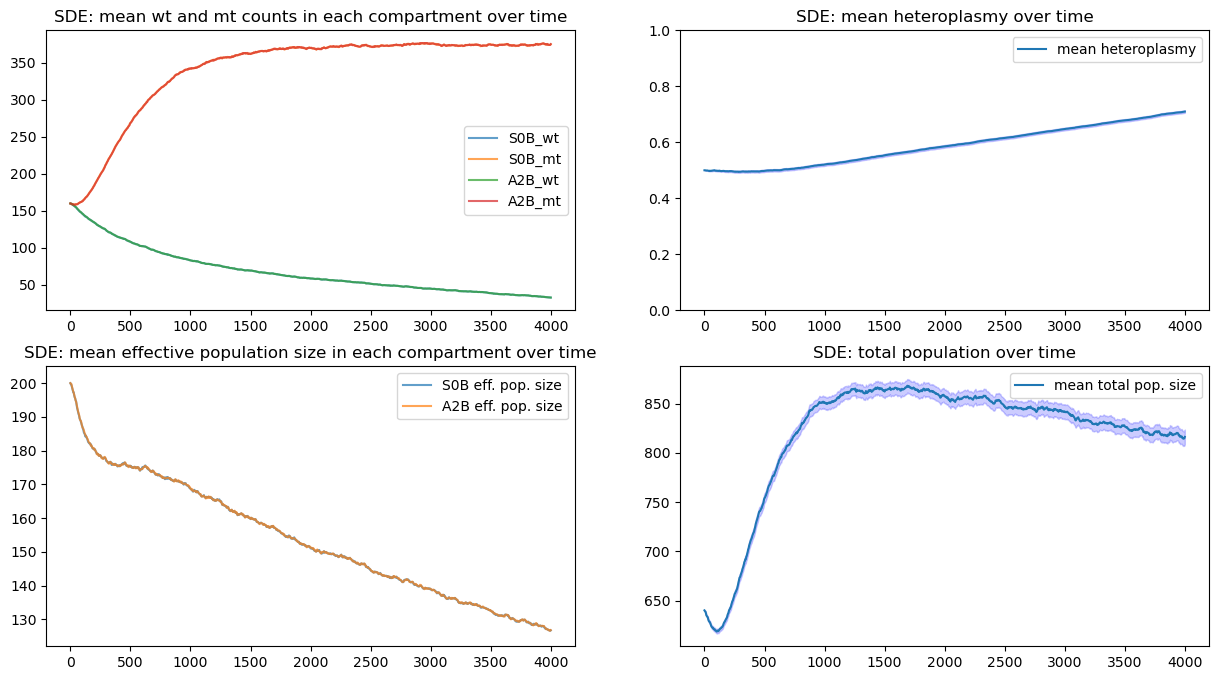

> Final mean counts of mt and wt in each compartment:
['S0B_wt  32.9636', 'S0B_mt  375.0064', 'A2B_wt  32.9734', 'A2B_mt  375.2558']

> Final mean effective population sizes in each compartment:
['S0B  126.7152', 'A2B  126.7874']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.7097 +-0.0045
delta: 0.2097

<<<< #### STARTING SIMULATION WITH C_B = 5e-05 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 5e-05*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 5e-05*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


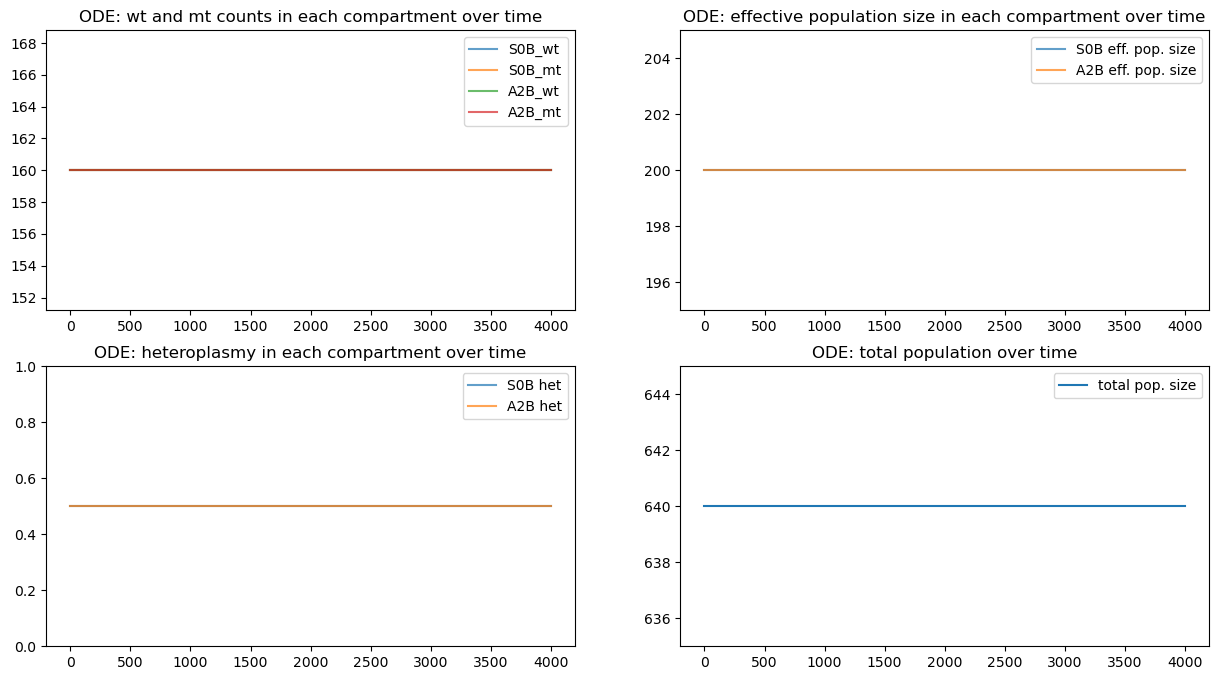

simulating using gillespie...


100%|██████████| 10000/10000 [12:44<00:00, 13.09it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


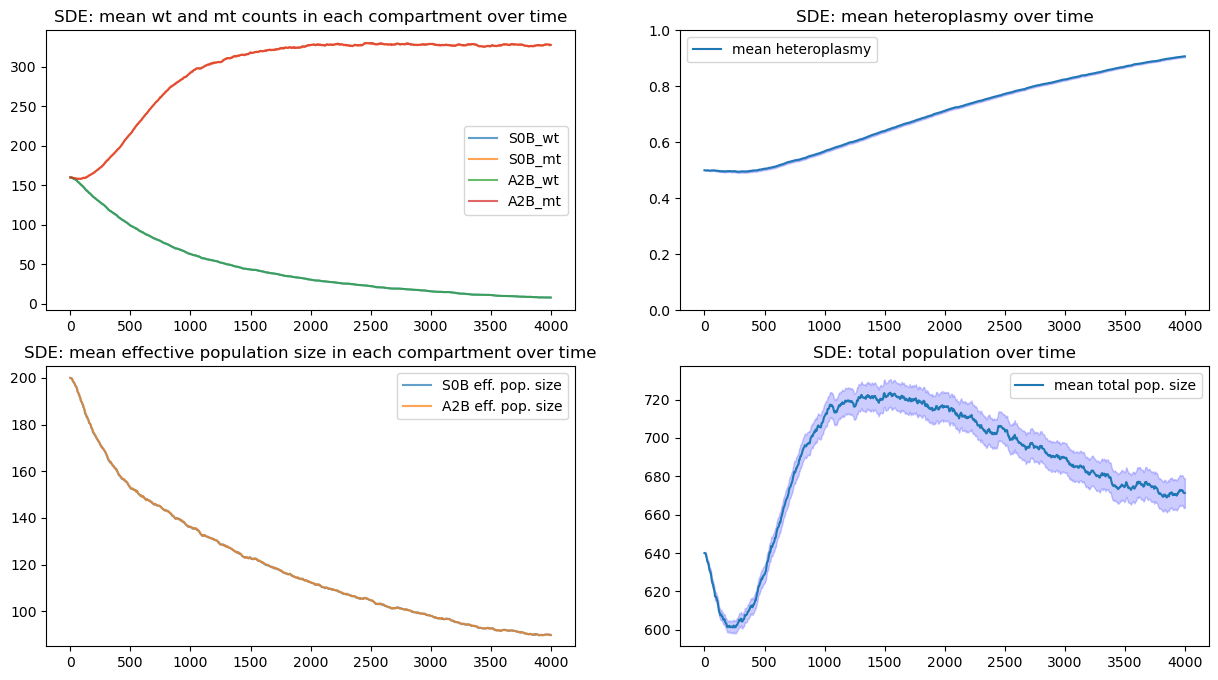

> Final mean counts of mt and wt in each compartment:
['S0B_wt  7.8747', 'S0B_mt  327.796', 'A2B_wt  7.8609', 'A2B_mt  327.8135']

> Final mean effective population sizes in each compartment:
['S0B  89.8237', 'A2B  89.8143']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.9068 +-0.0029
delta: 0.4068
simulating using tau leaping...


100%|██████████| 10000/10000 [05:13<00:00, 31.90it/s]


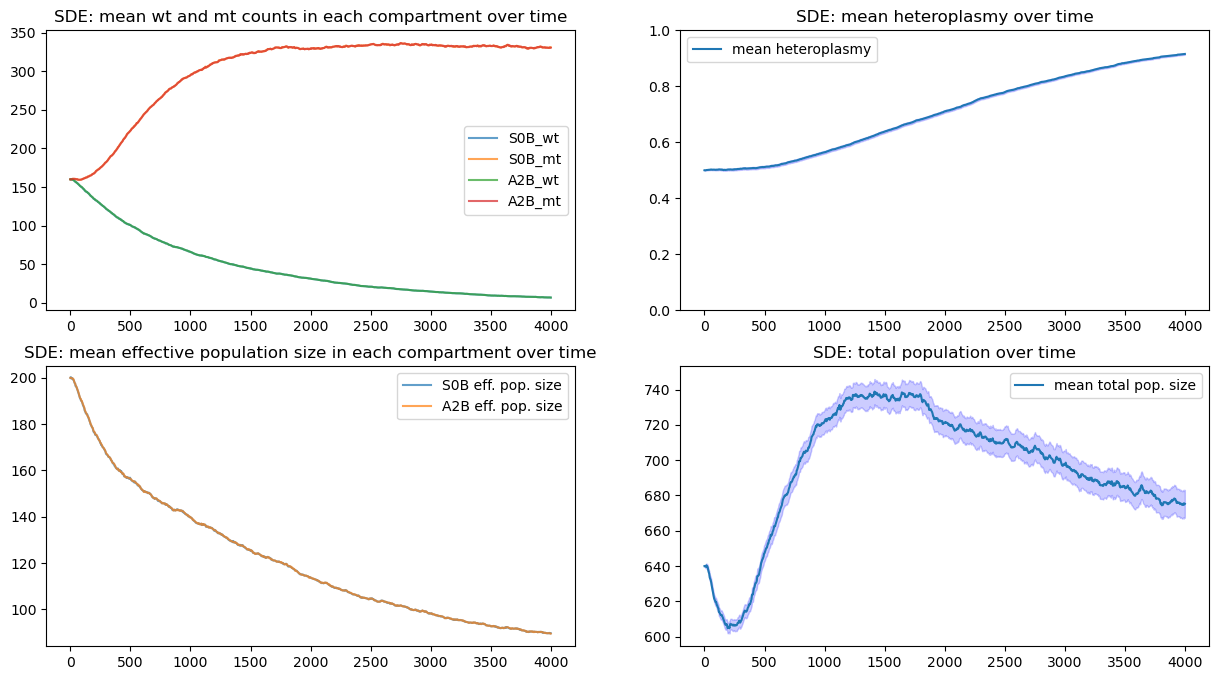

> Final mean counts of mt and wt in each compartment:
['S0B_wt  6.8699', 'S0B_mt  331.0517', 'A2B_wt  6.8697', 'A2B_mt  330.487']

> Final mean effective population sizes in each compartment:
['S0B  89.6328', 'A2B  89.4914']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.9154 +-0.0028
delta: 0.4154

<<<< #### STARTING SIMULATION WITH C_B = 2.5e-05 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 2.5e-05*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 2.5e-05*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


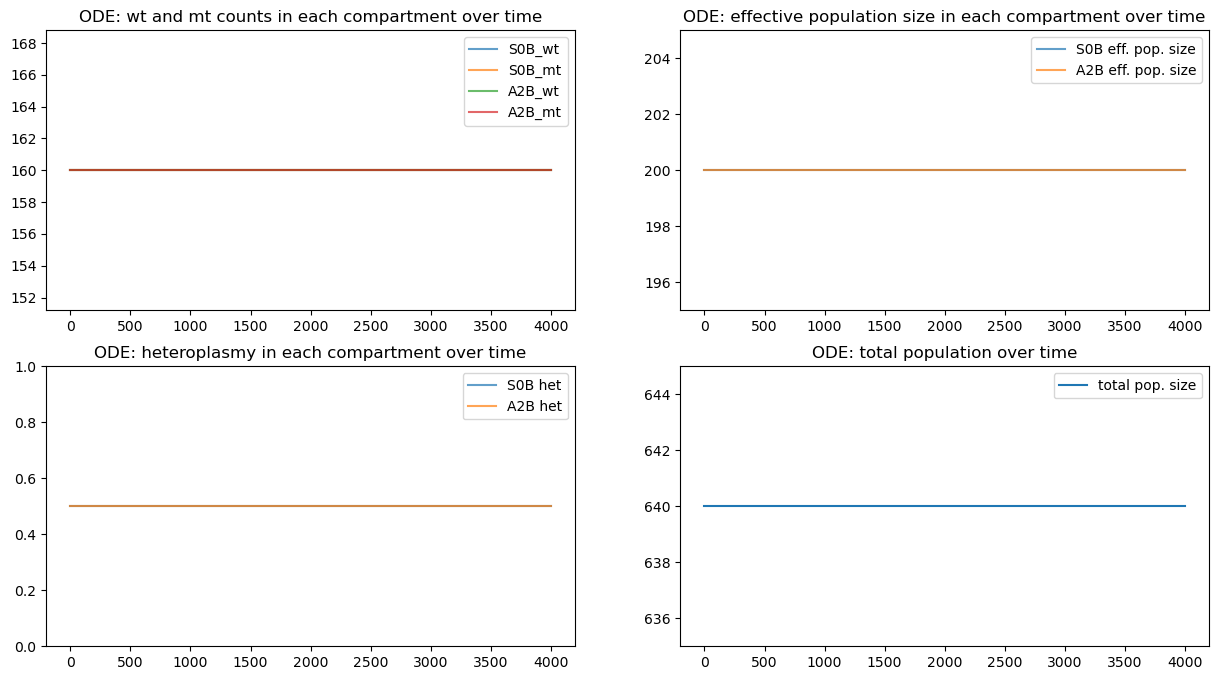

simulating using gillespie...


100%|██████████| 10000/10000 [09:13<00:00, 18.06it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


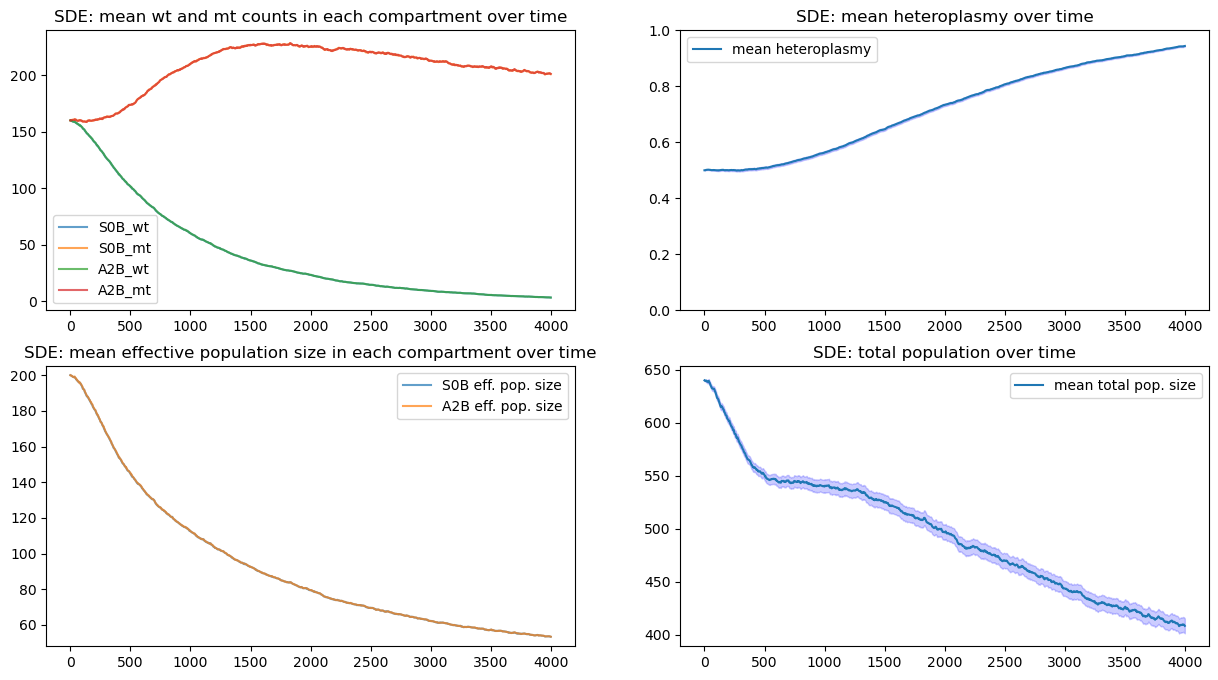

> Final mean counts of mt and wt in each compartment:
['S0B_wt  3.0885', 'S0B_mt  200.9914', 'A2B_wt  3.0671', 'A2B_mt  201.2719']

> Final mean effective population sizes in each compartment:
['S0B  53.3364', 'A2B  53.3851']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.9439 +-0.0023
delta: 0.4439
simulating using tau leaping...


100%|██████████| 10000/10000 [04:49<00:00, 34.59it/s]


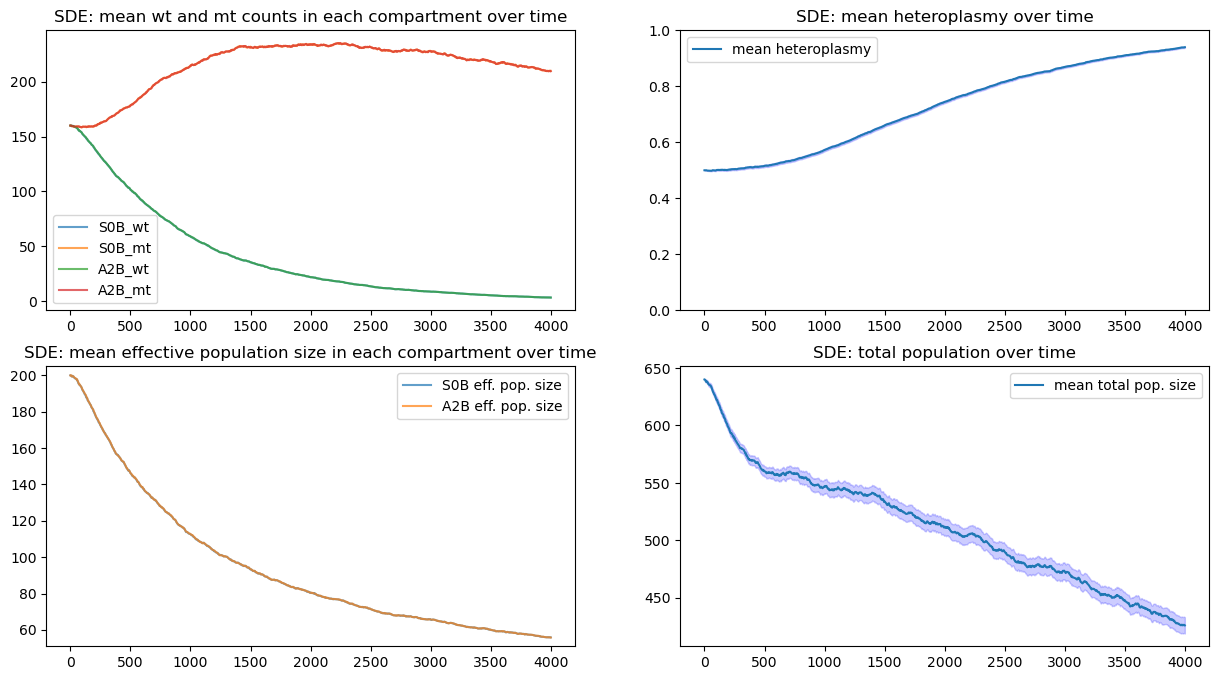

> Final mean counts of mt and wt in each compartment:
['S0B_wt  3.4579', 'S0B_mt  209.7412', 'A2B_wt  3.4383', 'A2B_mt  209.4923']

> Final mean effective population sizes in each compartment:
['S0B  55.8932', 'A2B  55.8114']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.9396 +-0.0024
delta: 0.4396

<<<< #### STARTING SIMULATION WITH C_B = 1e-05 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-05*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-05*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


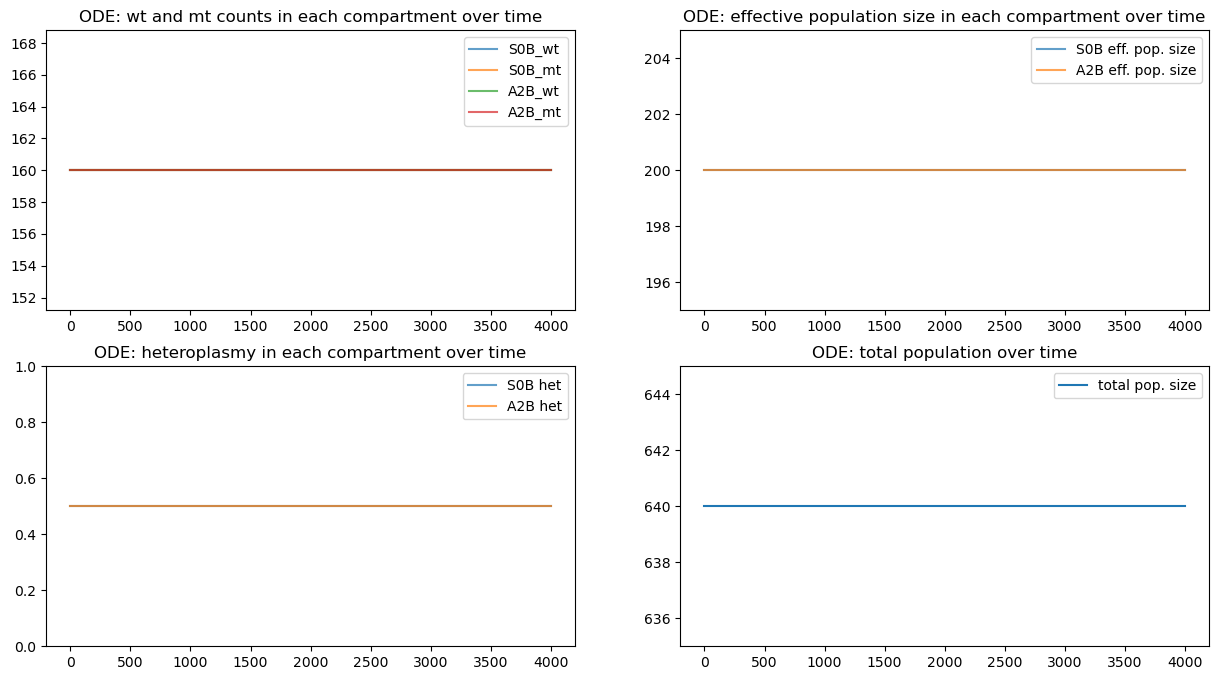

simulating using gillespie...


100%|██████████| 10000/10000 [07:12<00:00, 23.14it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


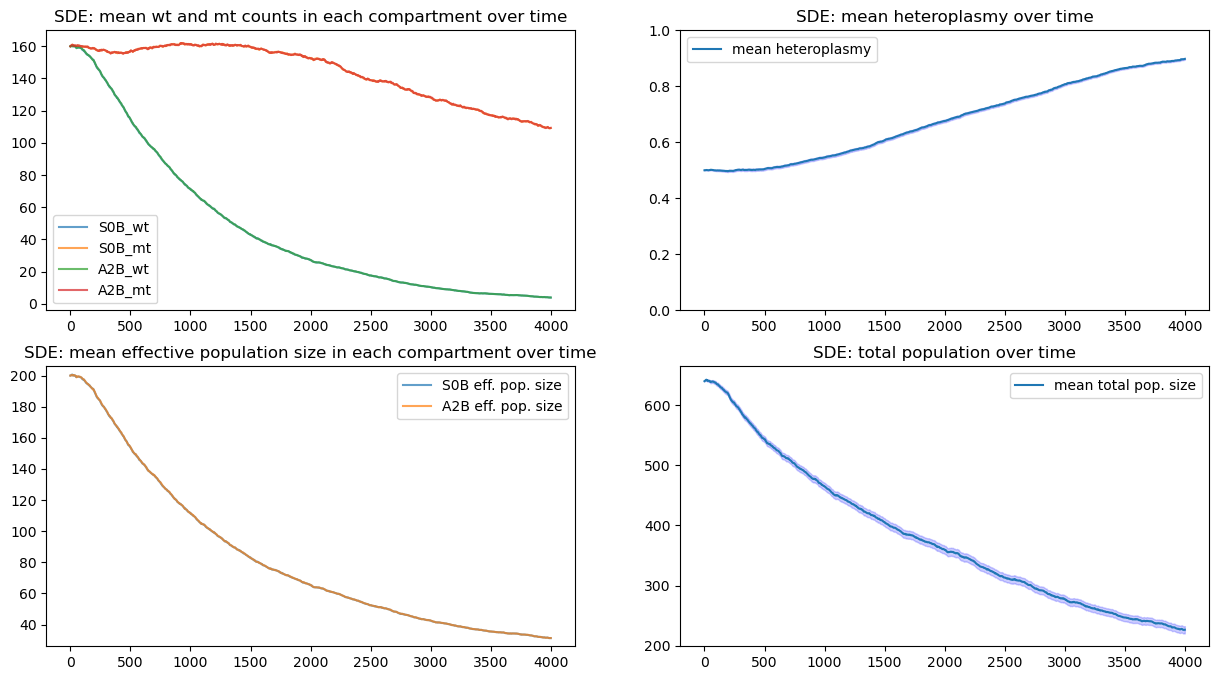

> Final mean counts of mt and wt in each compartment:
['S0B_wt  3.943', 'S0B_mt  109.205', 'A2B_wt  3.9701', 'A2B_mt  109.3158']

> Final mean effective population sizes in each compartment:
['S0B  31.2442', 'A2B  31.299']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.8978 +-0.003
delta: 0.3978
simulating using tau leaping...


100%|██████████| 10000/10000 [04:29<00:00, 37.12it/s]


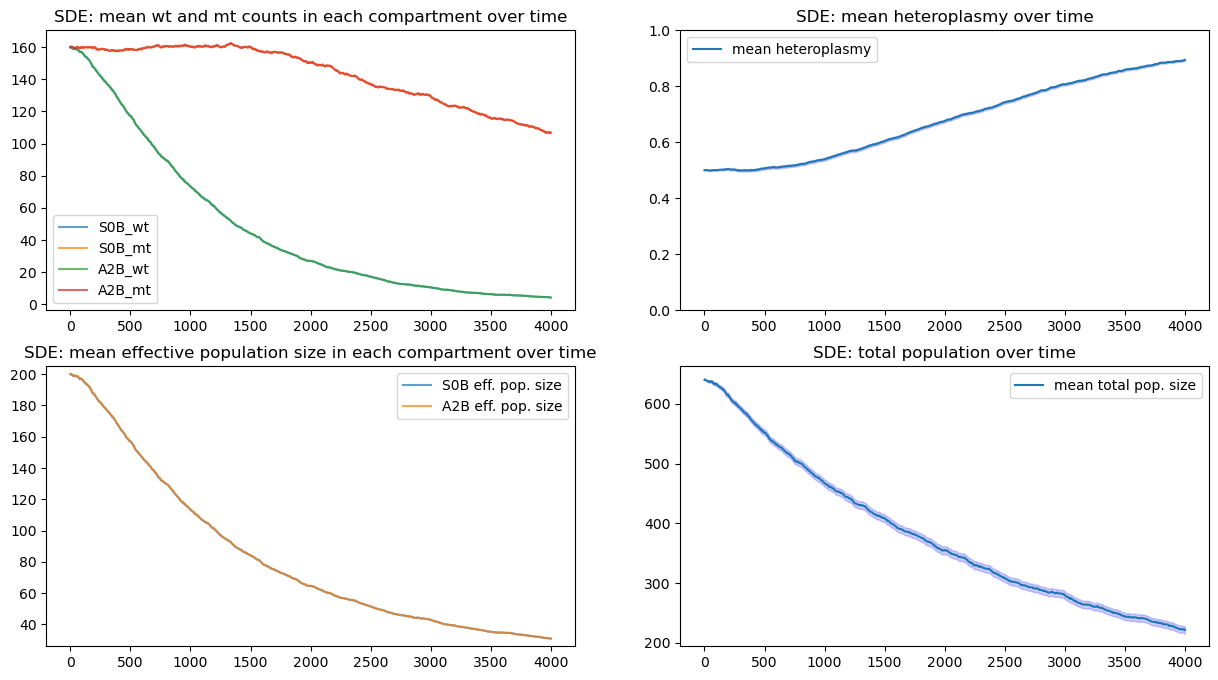

> Final mean counts of mt and wt in each compartment:
['S0B_wt  4.1915', 'S0B_mt  106.8525', 'A2B_wt  4.2323', 'A2B_mt  106.7731']

> Final mean effective population sizes in each compartment:
['S0B  30.9046', 'A2B  30.9256']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.8941 +-0.0031
delta: 0.3941

<<<< #### STARTING SIMULATION WITH C_B = 1e-06 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-06*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-06*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


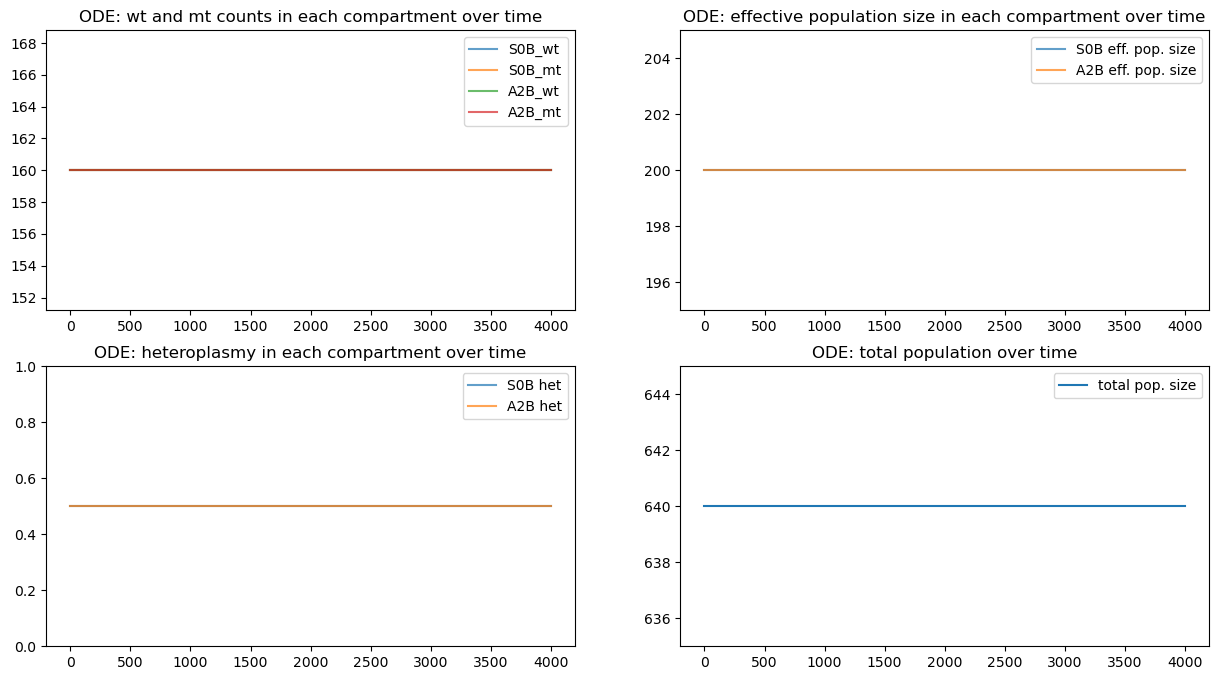

simulating using gillespie...


100%|██████████| 10000/10000 [08:55<00:00, 18.69it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


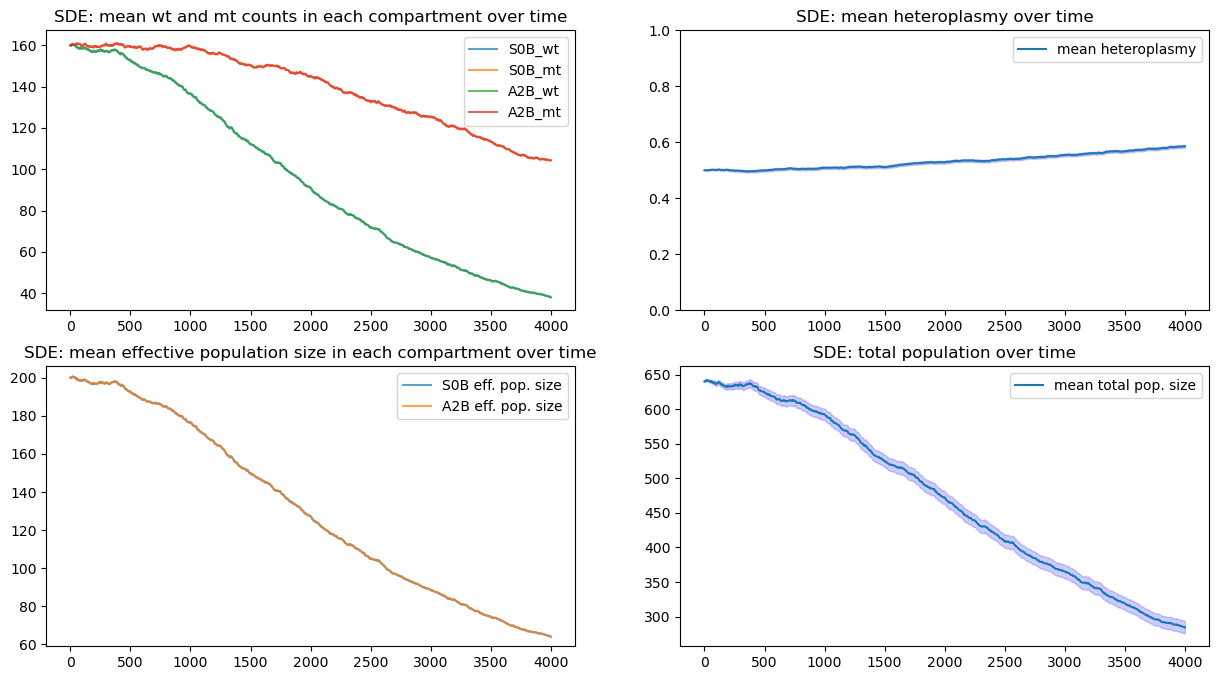

> Final mean counts of mt and wt in each compartment:
['S0B_wt  37.8442', 'S0B_mt  104.1232', 'A2B_wt  38.1063', 'A2B_mt  104.3656']

> Final mean effective population sizes in each compartment:
['S0B  63.875', 'A2B  64.1977']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5857 +-0.0049
delta: 0.0857
simulating using tau leaping...


100%|██████████| 10000/10000 [04:38<00:00, 35.91it/s]


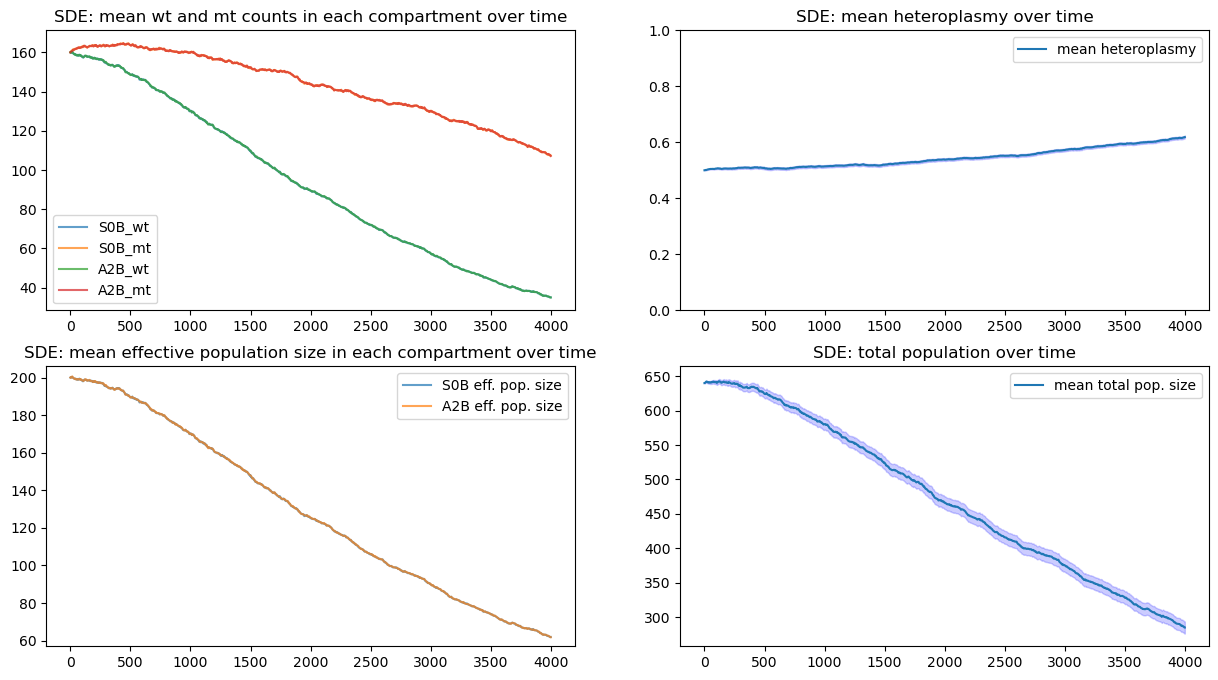

> Final mean counts of mt and wt in each compartment:
['S0B_wt  35.0779', 'S0B_mt  107.3989', 'A2B_wt  35.0266', 'A2B_mt  107.1433']

> Final mean effective population sizes in each compartment:
['S0B  61.9276', 'A2B  61.8124']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.6186 +-0.0048
delta: 0.1186

<<<< #### STARTING SIMULATION WITH C_B = 1e-07 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-07*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-07*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


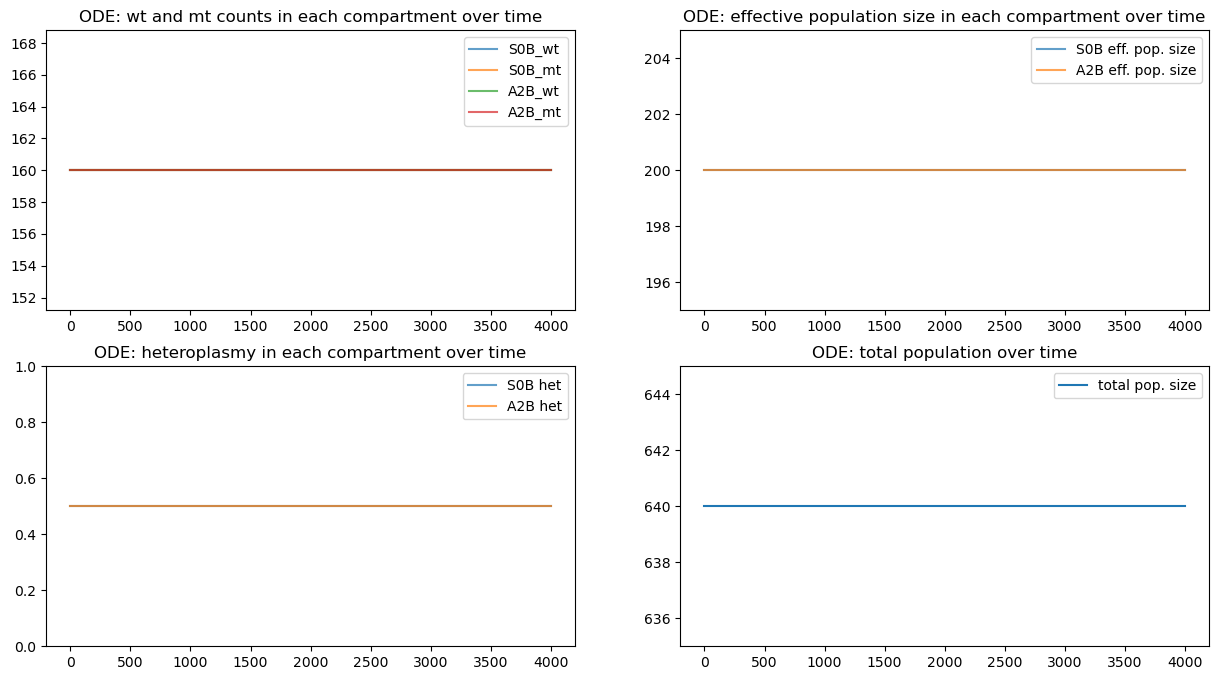

simulating using gillespie...


100%|██████████| 10000/10000 [11:25<00:00, 14.58it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


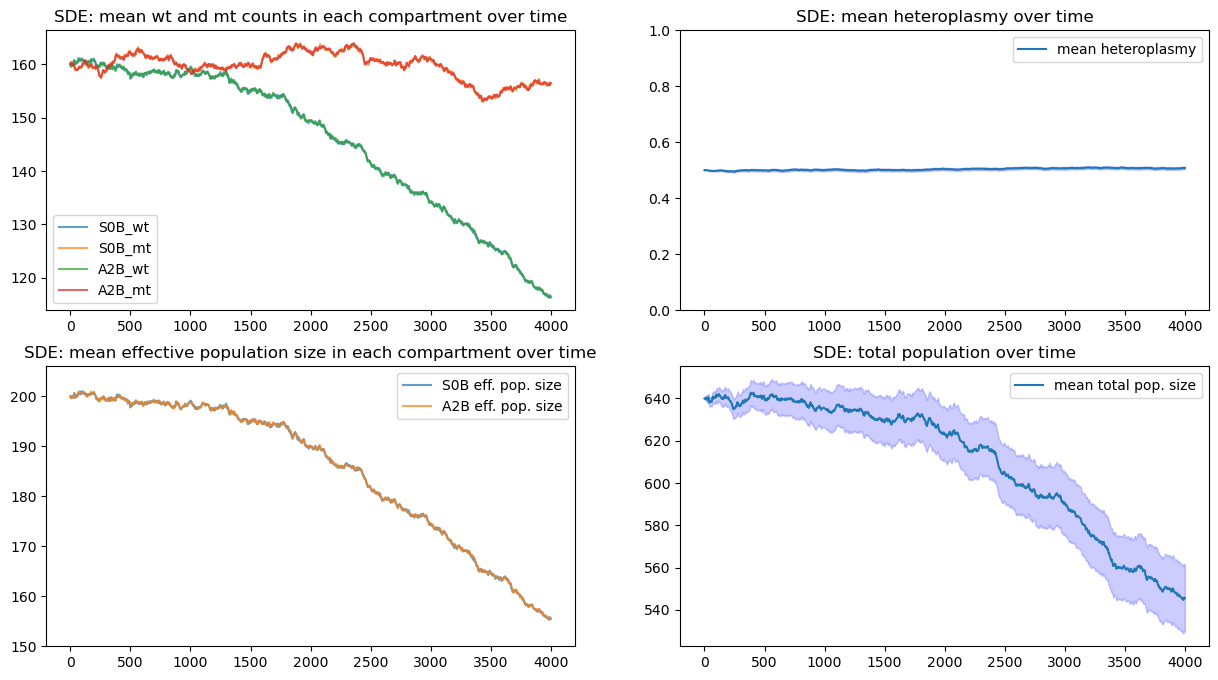

> Final mean counts of mt and wt in each compartment:
['S0B_wt  116.3634', 'S0B_mt  156.3828', 'A2B_wt  116.3892', 'A2B_mt  156.4936']

> Final mean effective population sizes in each compartment:
['S0B  155.4591', 'A2B  155.5126']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.508 +-0.0049
delta: 0.008
simulating using tau leaping...


100%|██████████| 10000/10000 [04:47<00:00, 34.76it/s]


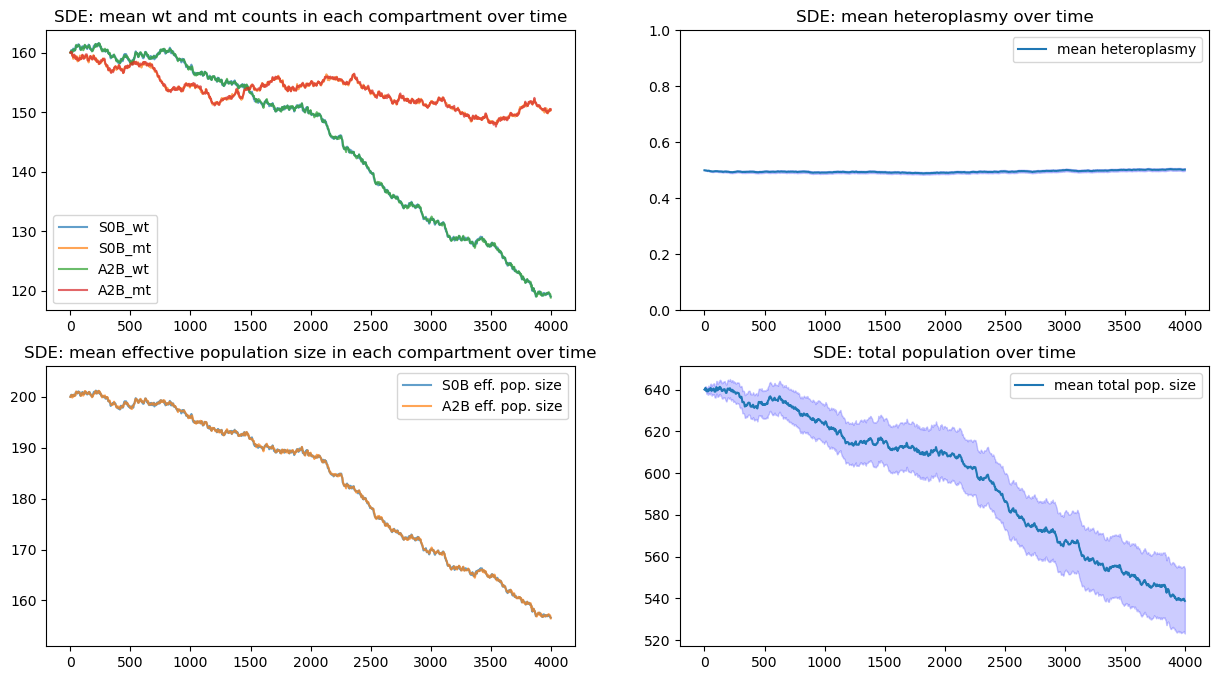

> Final mean counts of mt and wt in each compartment:
['S0B_wt  119.0429', 'S0B_mt  150.3182', 'A2B_wt  118.8635', 'A2B_mt  150.4902']

> Final mean effective population sizes in each compartment:
['S0B  156.6224', 'A2B  156.486']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5026 +-0.0049
delta: 0.0026

<<<< #### STARTING SIMULATION WITH C_B = 1e-08 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-08*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-08*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


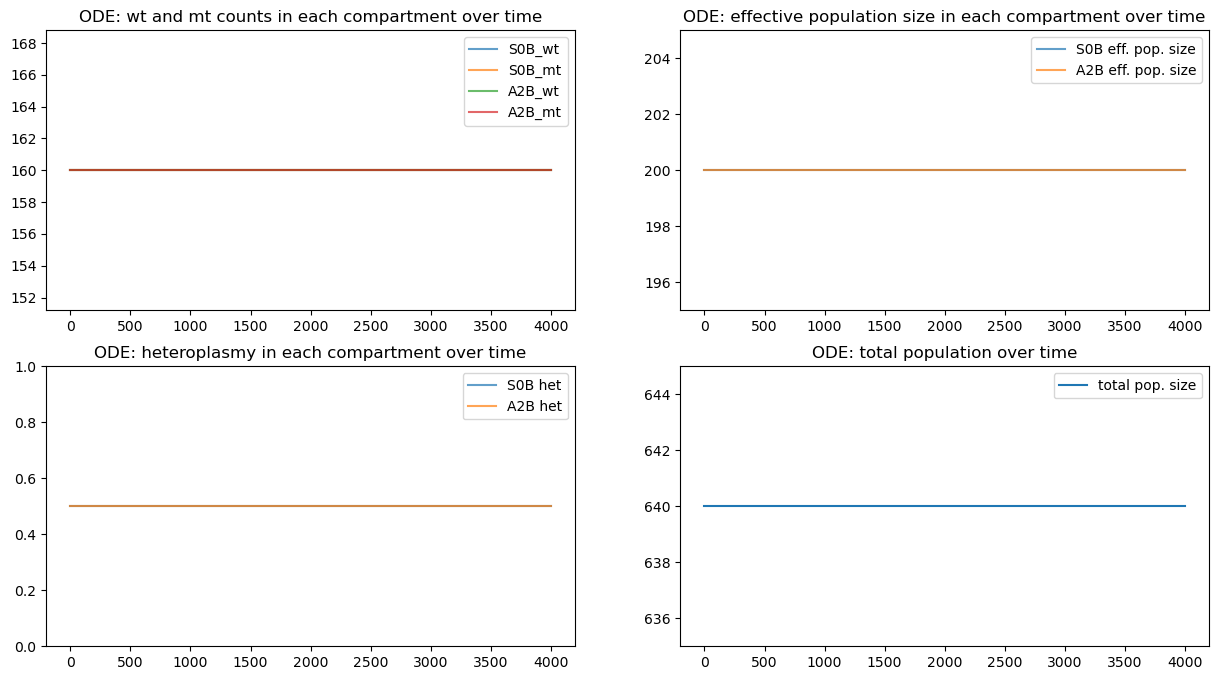

simulating using gillespie...


100%|██████████| 10000/10000 [11:33<00:00, 14.42it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


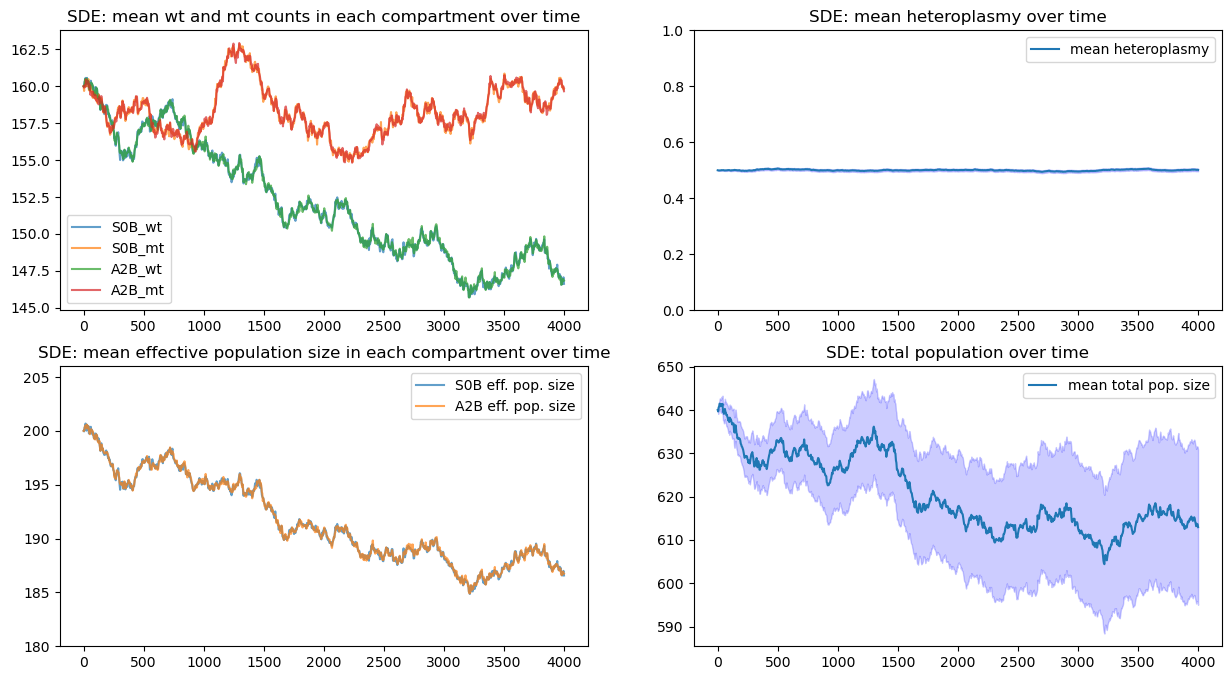

> Final mean counts of mt and wt in each compartment:
['S0B_wt  146.6163', 'S0B_mt  159.8399', 'A2B_wt  146.8311', 'A2B_mt  159.6637']

> Final mean effective population sizes in each compartment:
['S0B  186.5763', 'A2B  186.747']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5013 +-0.0049
delta: 0.0013
simulating using tau leaping...


100%|██████████| 10000/10000 [04:50<00:00, 34.41it/s]


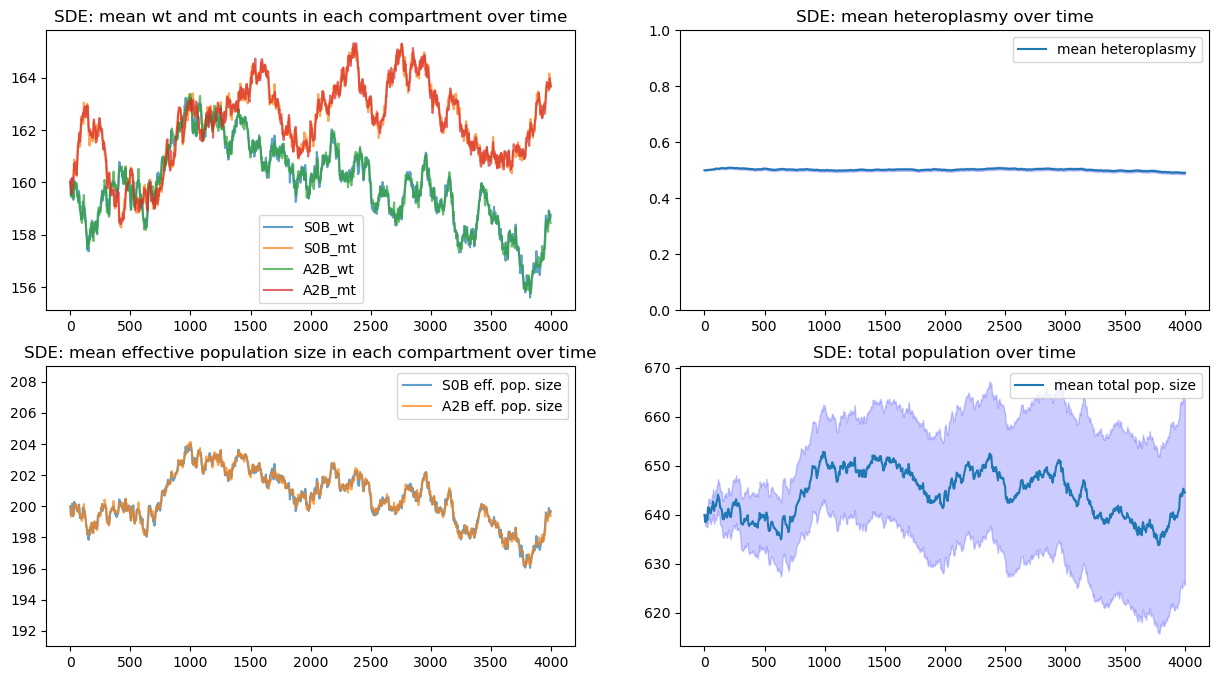

> Final mean counts of mt and wt in each compartment:
['S0B_wt  158.7646', 'S0B_mt  163.6523', 'A2B_wt  158.4586', 'A2B_mt  163.6721']

> Final mean effective population sizes in each compartment:
['S0B  199.6777', 'A2B  199.3766']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4906 +-0.0049
delta: -0.0094

<<<< #### STARTING SIMULATION WITH C_B = 1e-08 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-08*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-08*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


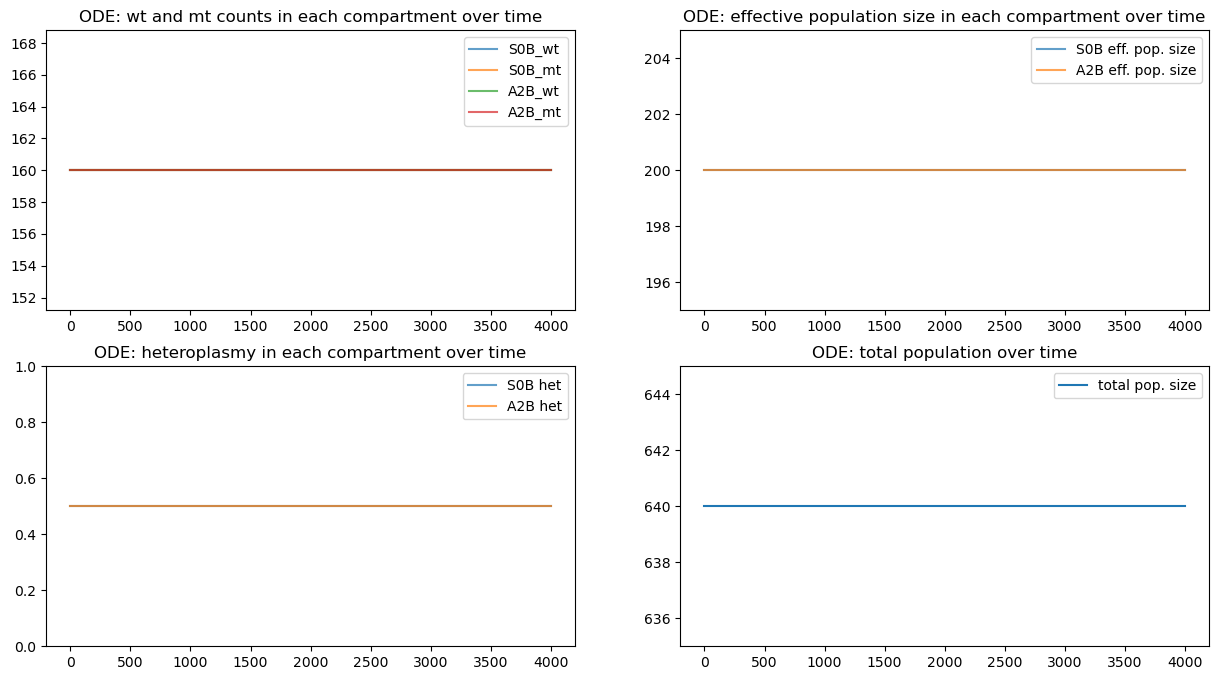

simulating using gillespie...


100%|██████████| 10000/10000 [11:53<00:00, 14.02it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


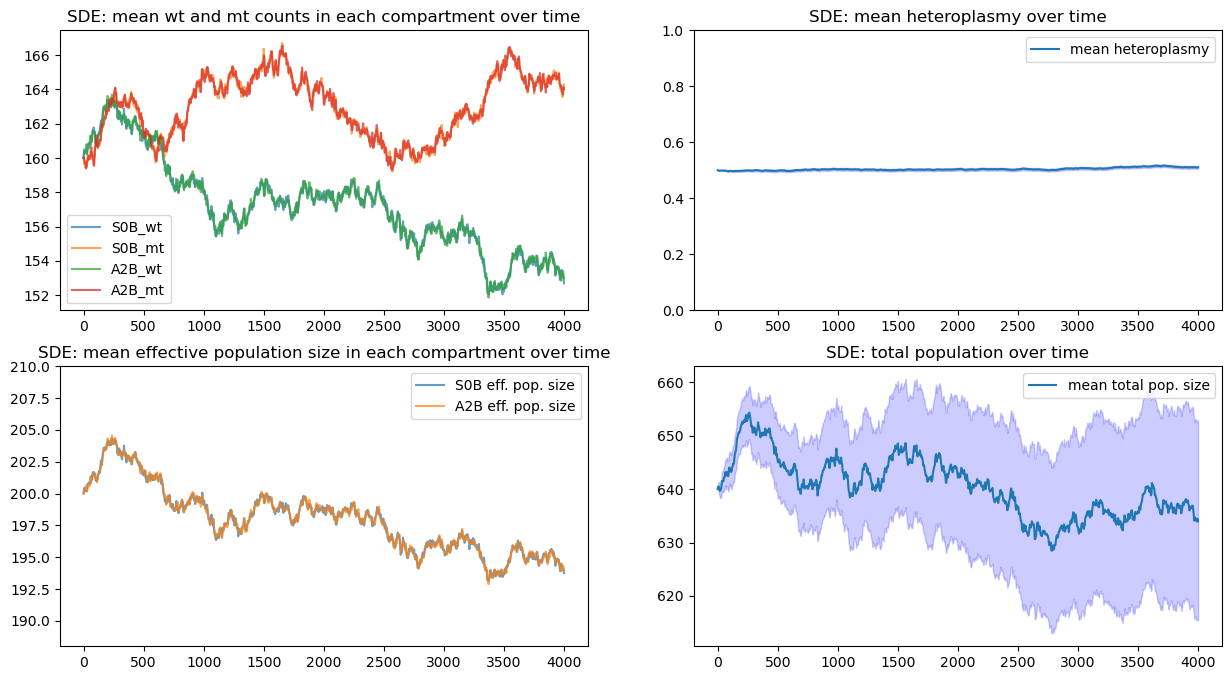

> Final mean counts of mt and wt in each compartment:
['S0B_wt  152.6845', 'S0B_mt  164.2902', 'A2B_wt  152.9885', 'A2B_mt  164.0313']

> Final mean effective population sizes in each compartment:
['S0B  193.757', 'A2B  193.9963']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5106 +-0.0049
delta: 0.0106
simulating using tau leaping...


100%|██████████| 10000/10000 [04:49<00:00, 34.57it/s]


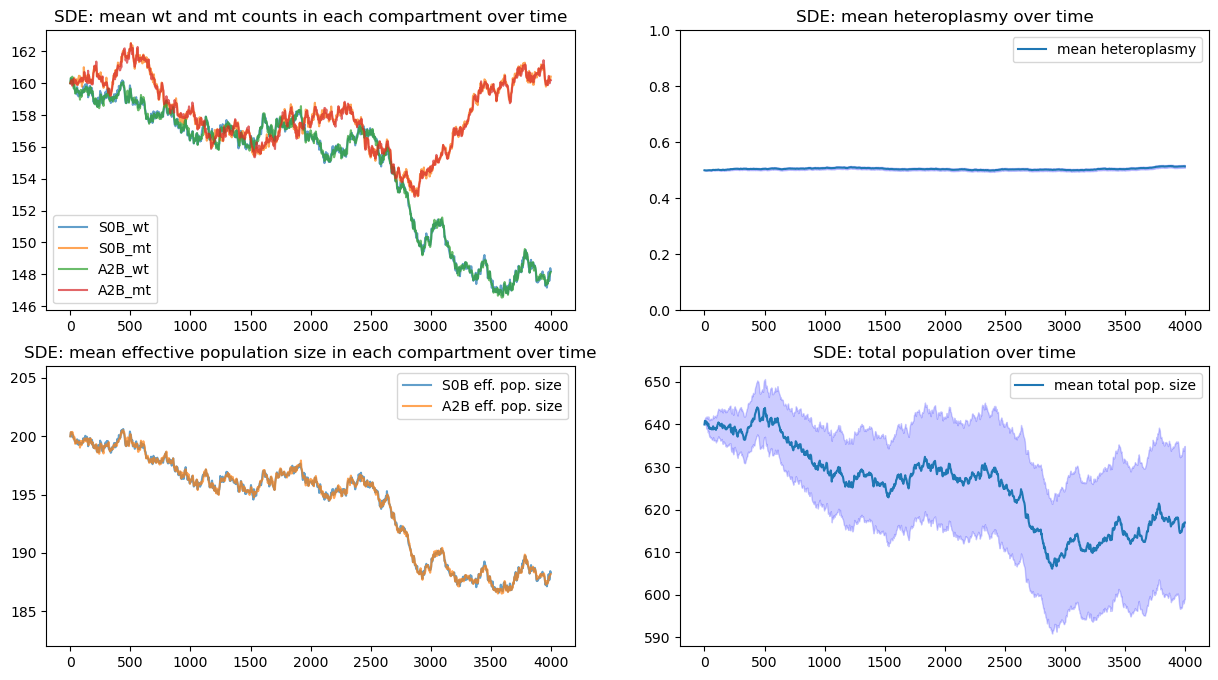

> Final mean counts of mt and wt in each compartment:
['S0B_wt  148.2049', 'S0B_mt  160.4167', 'A2B_wt  148.1348', 'A2B_mt  160.1936']

> Final mean effective population sizes in each compartment:
['S0B  188.3091', 'A2B  188.1832']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5139 +-0.0049
delta: 0.0139

<<<< #### STARTING SIMULATION WITH C_B = 1e-09 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-09*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-09*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


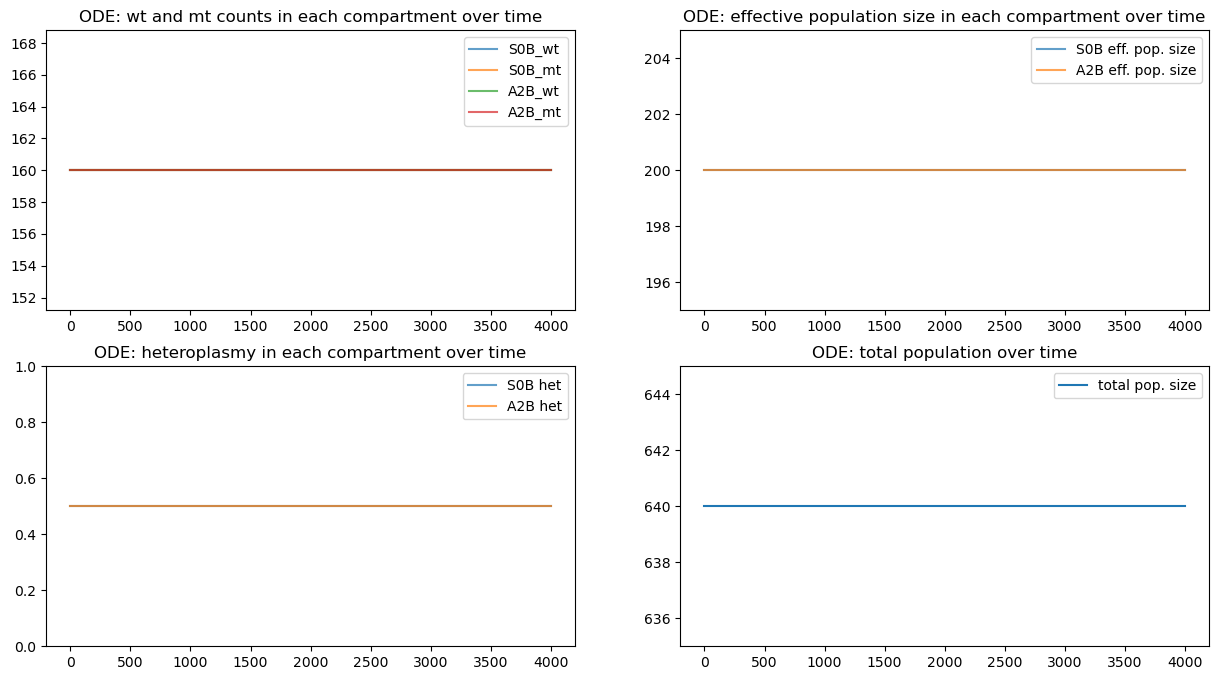

simulating using gillespie...


100%|██████████| 10000/10000 [11:51<00:00, 14.06it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


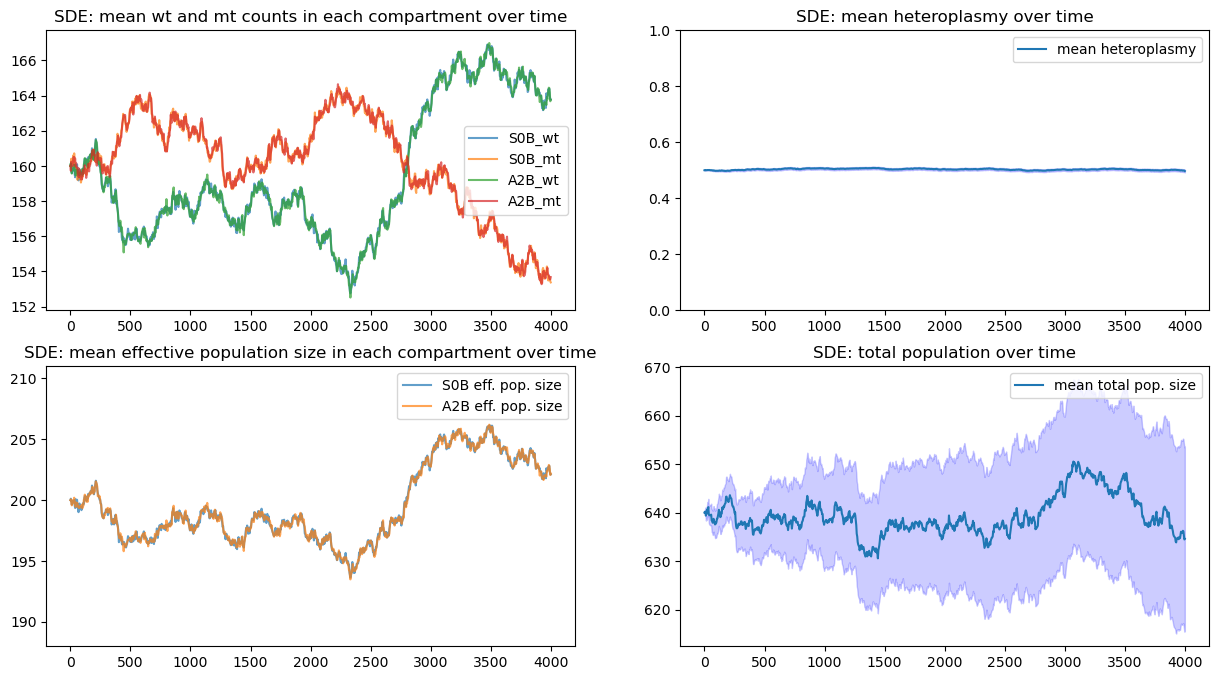

> Final mean counts of mt and wt in each compartment:
['S0B_wt  163.7743', 'S0B_mt  153.3794', 'A2B_wt  163.7676', 'A2B_mt  153.6805']

> Final mean effective population sizes in each compartment:
['S0B  202.1192', 'A2B  202.1877']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4972 +-0.0049
delta: -0.0028
simulating using tau leaping...


100%|██████████| 10000/10000 [04:52<00:00, 34.23it/s]


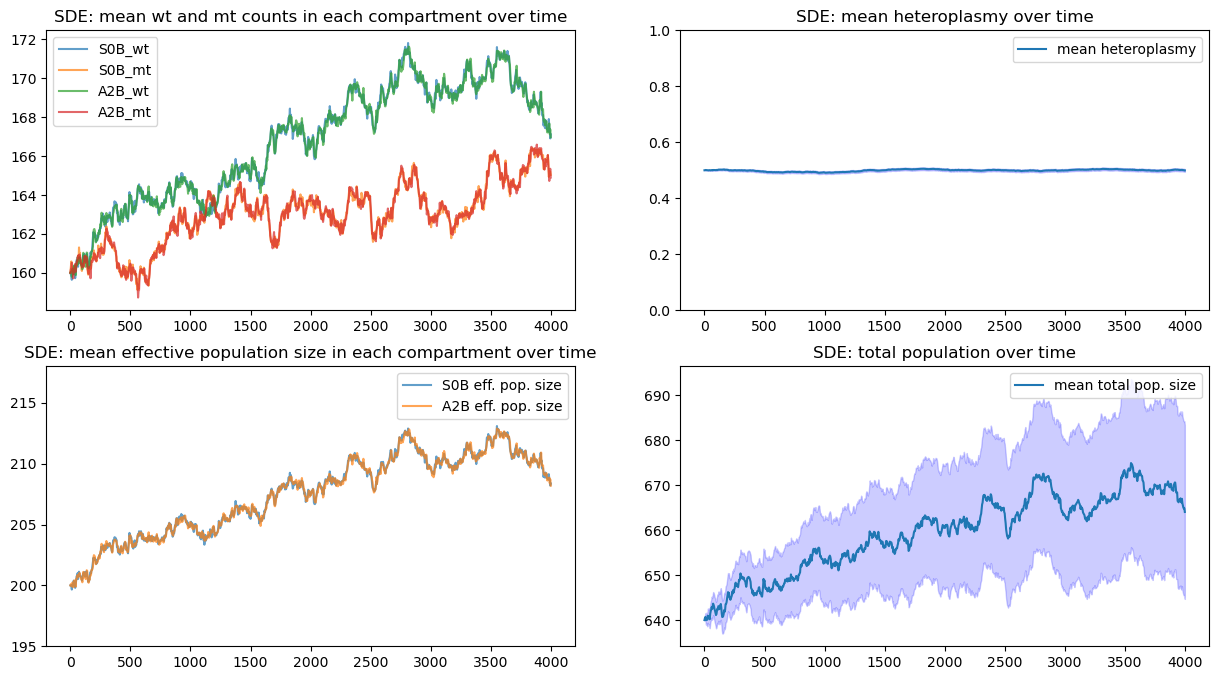

> Final mean counts of mt and wt in each compartment:
['S0B_wt  167.1201', 'S0B_mt  165.034', 'A2B_wt  166.9685', 'A2B_mt  164.8969']

> Final mean effective population sizes in each compartment:
['S0B  208.3786', 'A2B  208.1927']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4995 +-0.0049
delta: -0.0005

<<<< #### STARTING SIMULATION WITH C_B = 1e-10 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-10*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-10*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


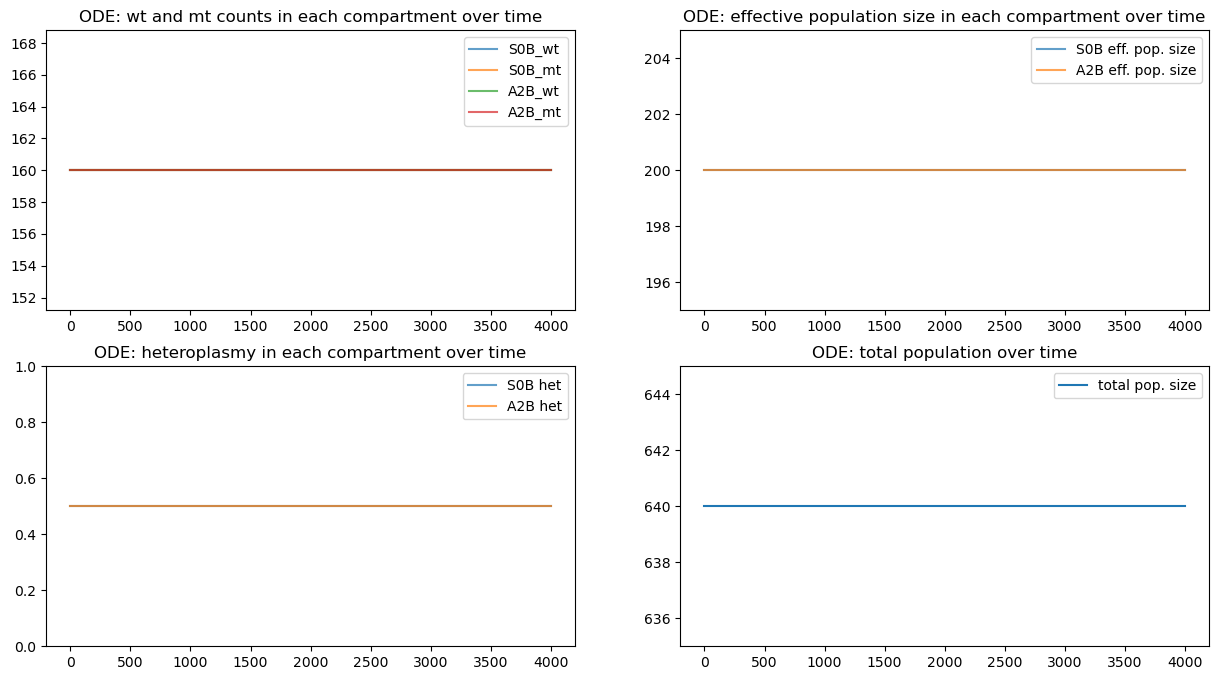

simulating using gillespie...


100%|██████████| 10000/10000 [12:04<00:00, 13.81it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


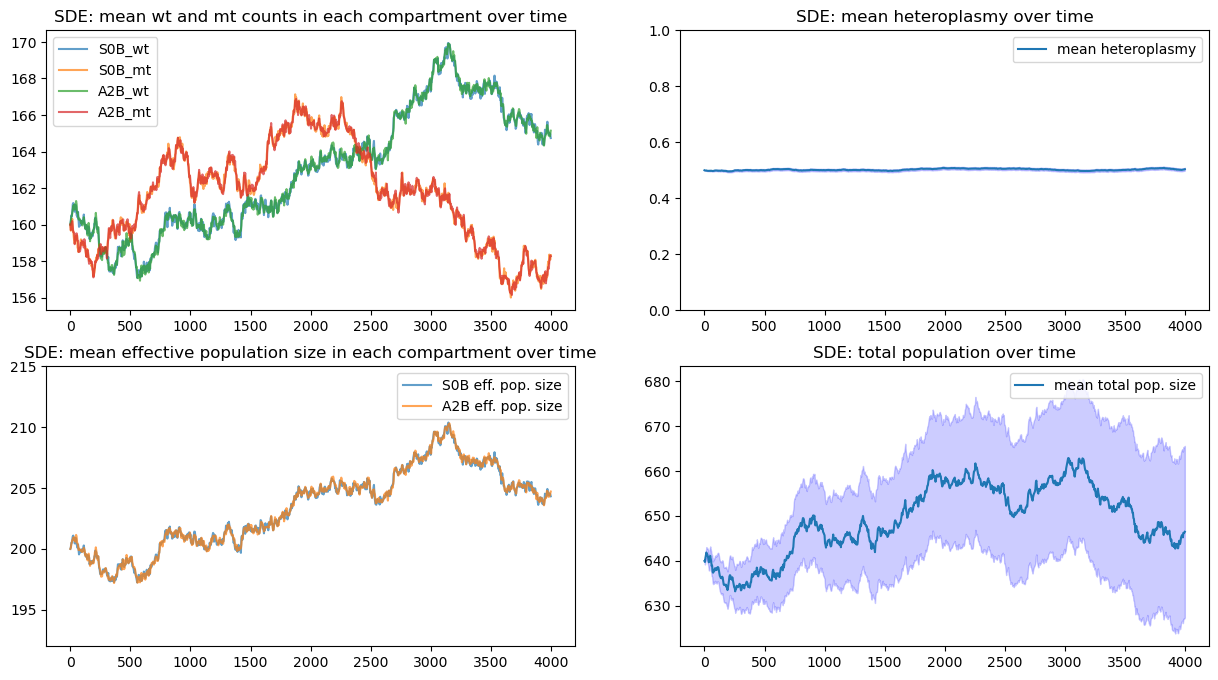

> Final mean counts of mt and wt in each compartment:
['S0B_wt  164.7383', 'S0B_mt  158.328', 'A2B_wt  165.1422', 'A2B_mt  158.2696']

> Final mean effective population sizes in each compartment:
['S0B  204.3203', 'A2B  204.7096']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5038 +-0.0049
delta: 0.0038
simulating using tau leaping...


100%|██████████| 10000/10000 [04:51<00:00, 34.25it/s]


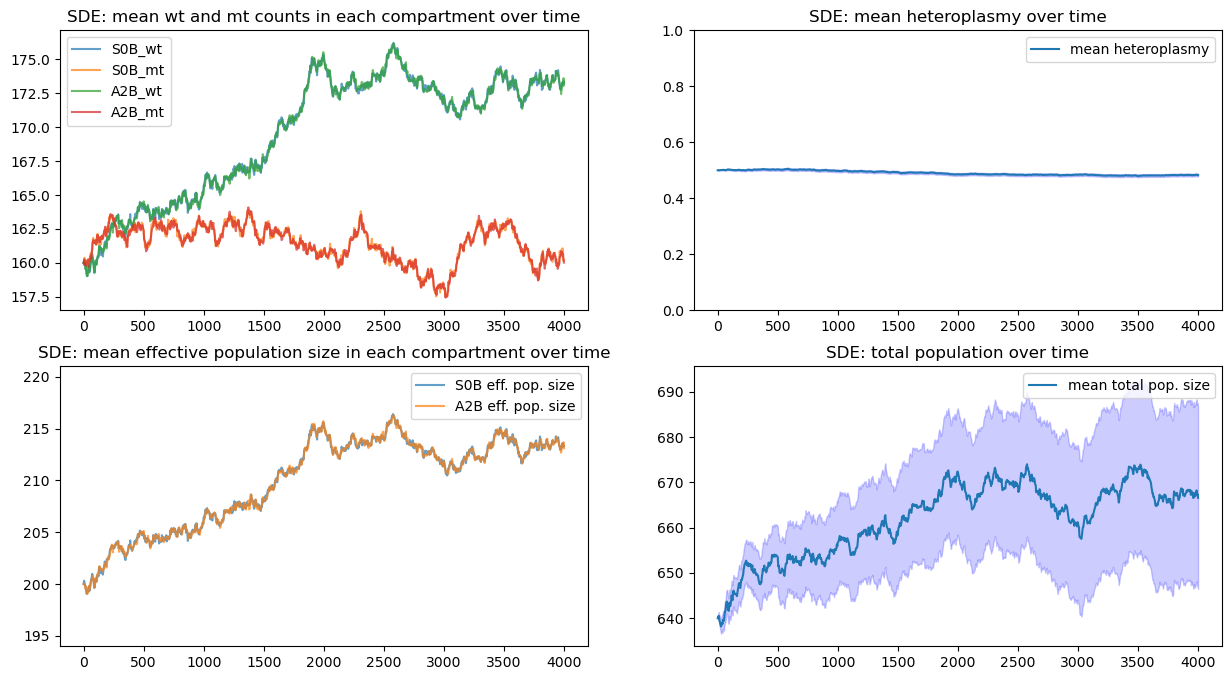

> Final mean counts of mt and wt in each compartment:
['S0B_wt  173.2549', 'S0B_mt  160.199', 'A2B_wt  173.1035', 'A2B_mt  160.0161']

> Final mean effective population sizes in each compartment:
['S0B  213.3046', 'A2B  213.1075']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4826 +-0.0049
delta: -0.0174

<<<< #### STARTING SIMULATION WITH C_B = 1e-11 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-11*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-11*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


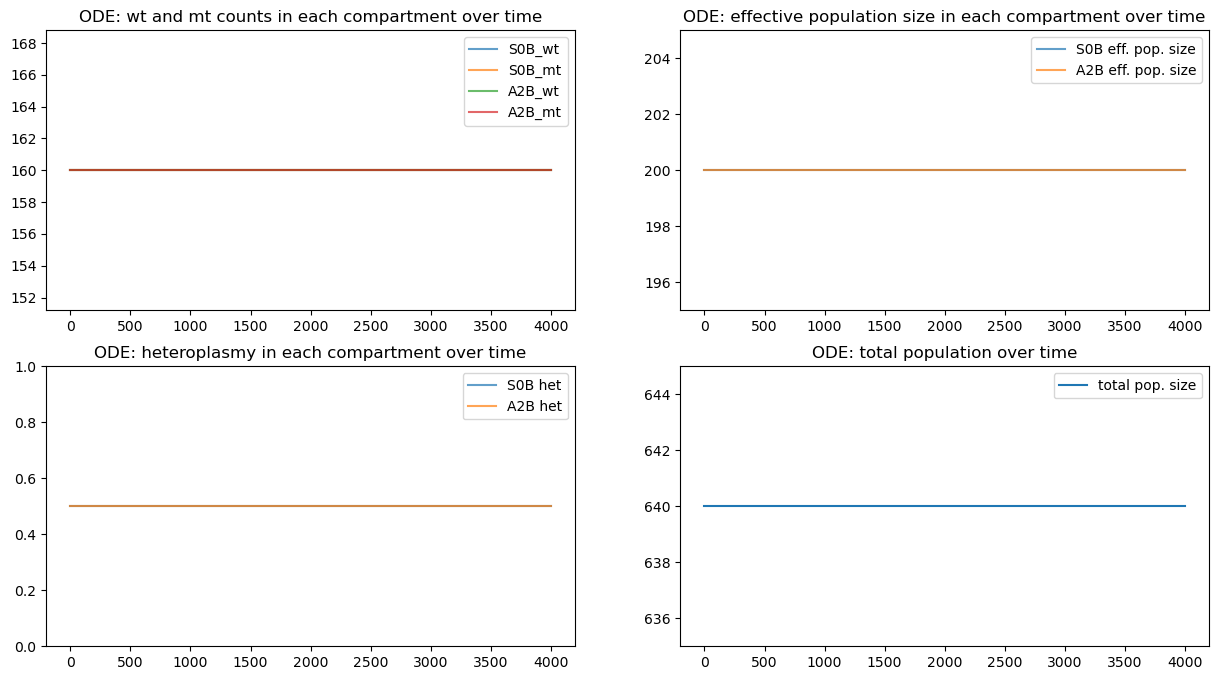

simulating using gillespie...


100%|██████████| 10000/10000 [12:10<00:00, 13.69it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


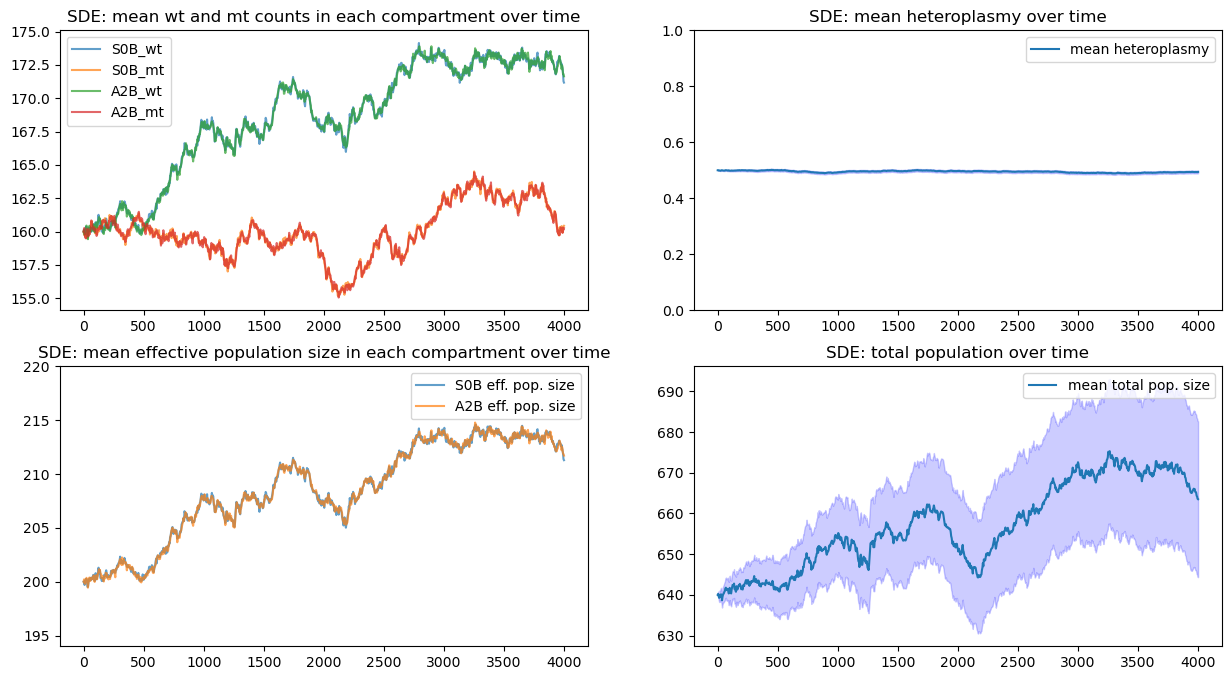

> Final mean counts of mt and wt in each compartment:
['S0B_wt  171.1723', 'S0B_mt  160.4329', 'A2B_wt  171.645', 'A2B_mt  160.2506']

> Final mean effective population sizes in each compartment:
['S0B  211.2805', 'A2B  211.7076']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4941 +-0.0049
delta: -0.0059
simulating using tau leaping...


100%|██████████| 10000/10000 [04:50<00:00, 34.45it/s]


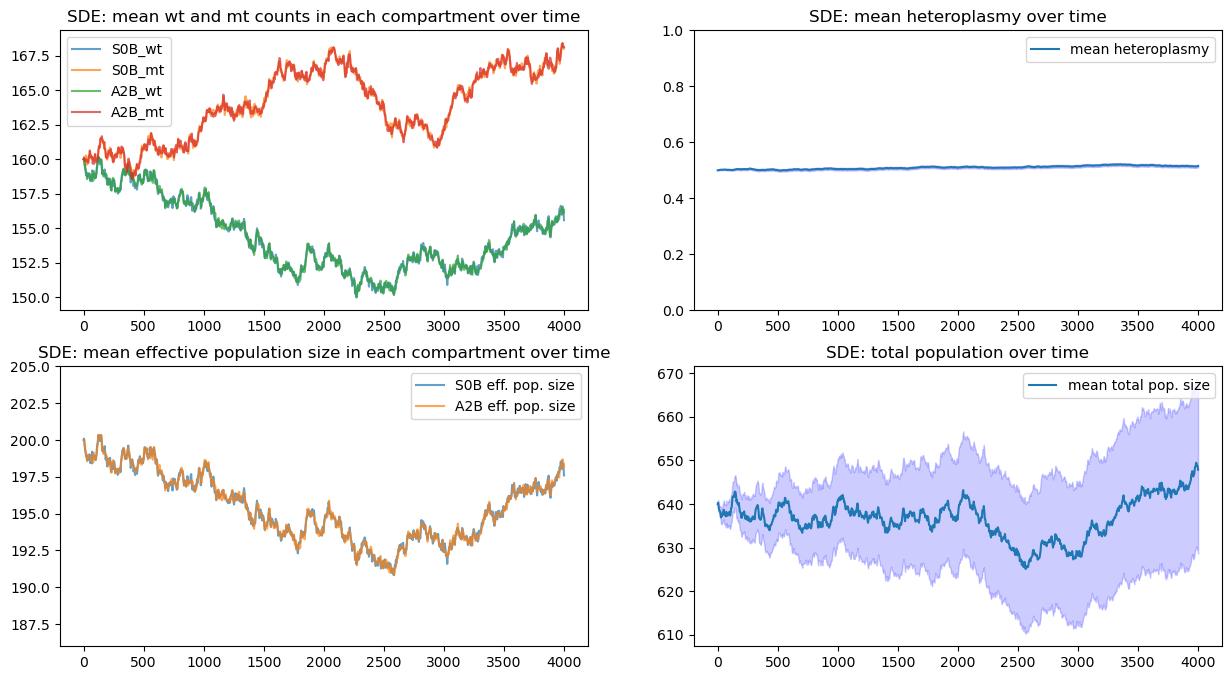

> Final mean counts of mt and wt in each compartment:
['S0B_wt  155.5924', 'S0B_mt  168.0067', 'A2B_wt  156.1456', 'A2B_mt  168.1223']

> Final mean effective population sizes in each compartment:
['S0B  197.5941', 'A2B  198.1762']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5151 +-0.0049
delta: 0.0151

<<<< #### STARTING SIMULATION WITH C_B = 1e-12 #### >>>>

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-12*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-12*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]


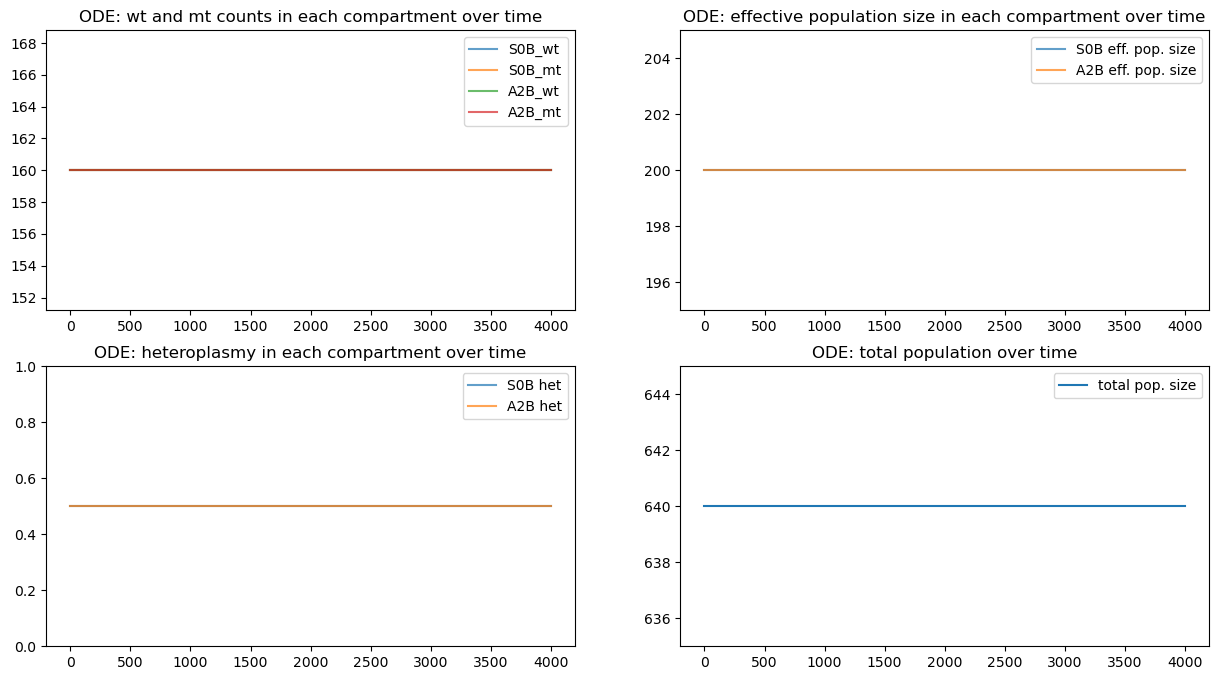

simulating using gillespie...


100%|██████████| 10000/10000 [11:43<00:00, 14.22it/s]
/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:138: RuntimeWarning: invalid value encountered in true_divide
  total_het = total_mt/(total_mt+total_wt)


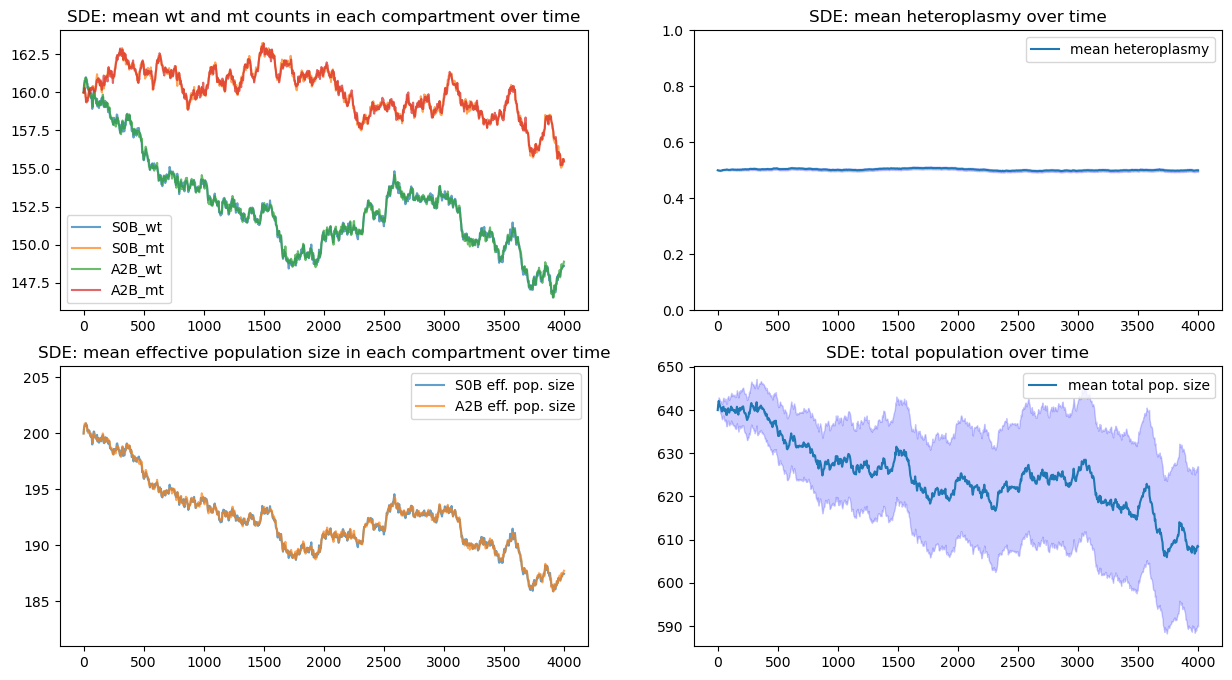

> Final mean counts of mt and wt in each compartment:
['S0B_wt  148.6008', 'S0B_mt  155.4807', 'A2B_wt  148.8781', 'A2B_mt  155.456']

> Final mean effective population sizes in each compartment:
['S0B  187.471', 'A2B  187.7421']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4993 +-0.0049
delta: -0.0007
simulating using tau leaping...


100%|██████████| 10000/10000 [04:51<00:00, 34.34it/s]


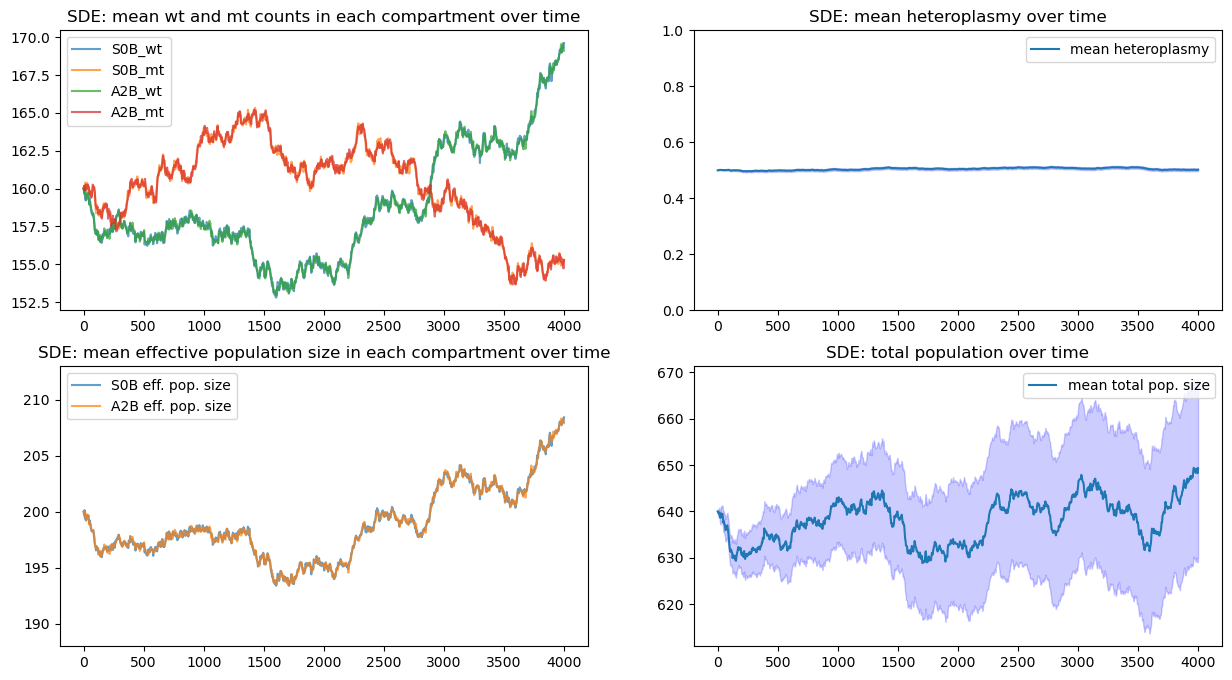

> Final mean counts of mt and wt in each compartment:
['S0B_wt  169.6167', 'S0B_mt  155.2868', 'A2B_wt  169.1045', 'A2B_mt  155.2805']

> Final mean effective population sizes in each compartment:
['S0B  208.4384', 'A2B  207.9246']

> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5018 +-0.0049
delta: 0.0018


In [4]:
C_B_val = [0.1, 0.01, 0.001, 0.0005, 0.0001, 0.00005, 0.000025, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001, 0.000000000001,]
for c_b in C_B_val:
    print(f"\n<<<< #### STARTING SIMULATION WITH C_B = {c_b} #### >>>>\n")
    
    G.nodes()['S0B']['c_b'] = c_b

    # infer the ode model
    ode_model = ode_from_network(G, prnt=True)

    # run the ode model
    ode_results = simulate_ode(ode_model, TIME_POINTS, START_STATE)
    plot_ode_results(ode_results, TIME_POINTS, DELTA, VARS, NODES, prnt=False)

    # infer the parameterse of the sde systems
    SDE_PARAM = sde_param_from_network(G, prnt=False)

    # run the gillespie simulation
    gillespie_results = simulate_gillespie(SDE_PARAM, TIME_POINTS, START_STATE, replicates=REP)
    plot_sde_results(gillespie_results, TIME_POINTS, DELTA, VARS, NODES, prnt = True)

    # run the tau leaping simulation
    tauleaping_results = simulate_tauleaping(SDE_PARAM, TIME_POINTS, START_STATE, replicates=REP, timestep=0.01)
    plot_sde_results(tauleaping_results, TIME_POINTS, DELTA, VARS, NODES, prnt = True)